## Use rf07b model (with awards and allstar info)

In [316]:
import pandas as pd
import numpy as np
import sklearn as sk
import pickle
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import hinge_loss
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [3]:
with open('rf03e2.pkl') as f:
    rf03e2 = pickle.load(f)


In [4]:
with open('rf06.pkl') as f:
    rf06 = pickle.load(f)


In [16]:
with open('rf06c.pkl') as f:
    rf06c = pickle.load(f)


In [17]:
with open('active_hitters_X6.pkl') as f:
    active_hitters_X6 = pickle.load(f)


In [2]:
with open('rf07b.pkl') as f:
    rf07b = pickle.load(f)


In [3]:
with open('active_hitters_X7.pkl') as f:
    active_hitters_X7 = pickle.load(f)


In [35]:
with open('rf08b.pkl') as f:
    rf08b = pickle.load(f)
    

In [36]:
with open('active_hitters_X8.pkl') as f:
    active_hitters_X8 = pickle.load(f)
    

In [51]:
with open('rf09b.pkl') as f:
    rf09b = pickle.load(f)
    

In [52]:
with open('active_hitters_X9.pkl') as f:
    active_hitters_X9 = pickle.load(f)
    

In [248]:
with open('recent_hitters_X9.pkl') as f:
    recent_hitters_X9 = pickle.load(f)
    

In [7]:
with open('active_hitters_X3.pkl') as f:
    active_hitters_X3 = pickle.load(f)

with open('active_hitters.pkl') as f:
    active_hitters = pickle.load(f)

with open('recent_hitters_X3.pkl') as f:
    recent_hitters_X3 = pickle.load(f)

with open('recent_hitters.pkl') as f:
    recent_hitters = pickle.load(f)


In [8]:
with open('active_hitters.pkl') as f:
    active_hitters = pickle.load(f)


In [21]:
with open('active_hitters.pkl') as f:
    active_hitters6 = pickle.load(f)


In [22]:
with open('active_hitters.pkl') as f:
    active_hitters7 = pickle.load(f)


In [37]:
with open('active_hitters.pkl') as f:
    active_hitters8 = pickle.load(f)


In [56]:
with open('active_hitters.pkl') as f:
    active_hitters9 = pickle.load(f)


In [249]:
with open('recent_hitters.pkl') as f:
    recent_hitters9 = pickle.load(f)


In [53]:
active_hitters_X3.head(5)

,R_ratio,H_ratio,HR_ratio,RBI_ratio,SB_ratio,BB_ratio,year,yearID,RBI_filled,SB_filled
136,0.323093,0.339352,0.611266,0.340209,0.456546,0.270966,1,2014,0,0
137,0.187602,0.175629,0.305633,0.175970,0.256807,0.175331,2,2015,0,0
235,0.097411,0.105724,0.114263,0.098681,0.053338,0.089384,1,2013,0,0
236,0.141247,0.183626,0.142829,0.131575,0.133346,0.134076,2,2014,0,0
237,0.211058,0.229996,0.190438,0.175433,0.213353,0.193666,3,2015,0,0


In [54]:
active_hitters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3328 entries, 136 to 53535
Data columns (total 2 columns):
playerID    3328 non-null object
yearID      3328 non-null int64
dtypes: int64(1), object(1)
memory usage: 78.0+ KB


In [55]:
type(active_hitters)

pandas.core.frame.DataFrame

In [185]:
active_hitters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3328 entries, 136 to 53535
Data columns (total 3 columns):
playerID    3328 non-null object
name        3328 non-null object
yearID      3328 non-null int64
dtypes: int64(1), object(2)
memory usage: 104.0+ KB


In [57]:
active_pred = rf03e2.predict(active_hitters_X3)

In [58]:
type(active_pred)

numpy.ndarray

In [59]:
np.unique(active_pred)

array([0, 1])

In [60]:
len(active_pred)

3328

In [61]:
active_pred

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
active_prob = rf03e2.predict_proba(active_hitters_X3)

In [63]:
np.unique(active_prob)

array([ 0.        ,  0.00363636,  0.00727273,  0.01090909,  0.01454545,
        0.01818182,  0.02181818,  0.02545455,  0.02909091,  0.03272727,
        0.03636364,  0.04      ,  0.04363636,  0.04727273,  0.05090909,
        0.05454545,  0.05818182,  0.06181818,  0.06545455,  0.06909091,
        0.07272727,  0.07636364,  0.08      ,  0.08363636,  0.08727273,
        0.09090909,  0.09454545,  0.09818182,  0.10181818,  0.10545455,
        0.10909091,  0.11272727,  0.11636364,  0.12      ,  0.12363636,
        0.12727273,  0.13090909,  0.13454545,  0.13818182,  0.14181818,
        0.14545455,  0.14909091,  0.15272727,  0.15636364,  0.16      ,
        0.16363636,  0.16727273,  0.17090909,  0.17454545,  0.17818182,
        0.18181818,  0.18545455,  0.18909091,  0.19272727,  0.19636364,
        0.2       ,  0.20363636,  0.20727273,  0.21090909,  0.21454545,
        0.21818182,  0.22181818,  0.22545455,  0.22909091,  0.23272727,
        0.23636364,  0.24      ,  0.24363636,  0.24727273,  0.25

In [64]:
len(active_prob[:,1])

3328

In [65]:
mask = active_pred == 1

In [66]:
len(mask)

3328

In [67]:
active_hitters['pred'] = pd.Series(active_pred, index=active_hitters.index)

In [68]:
active_hitters['prob'] = pd.Series(active_prob[:,1], index=active_hitters.index)

In [69]:
pd.options.display.max_rows = 999

In [70]:
active_hitters.index

Int64Index([  136,   137,   235,   236,   237,   310,   311,   326,   486,
              487,
            ...
            53526, 53527, 53528, 53529, 53530, 53531, 53532, 53533, 53534,
            53535],
           dtype='int64', length=3328)

In [71]:
pd.Series(active_prob[:,1], index=active_hitters.index)

136      0.058182
137      0.000000
235      0.003636
236      0.000000
237      0.000000
310      0.000000
311      0.003636
326      0.040000
486      0.029091
487      0.003636
488      0.000000
489      0.000000
493      0.083636
494      0.076364
495      0.043636
717      0.000000
718      0.000000
719      0.003636
720      0.000000
865      0.007273
866      0.018182
867      0.000000
868      0.000000
869      0.007273
870      0.000000
871      0.007273
872      0.014545
873      0.003636
874      0.003636
875      0.000000
876      0.000000
877      0.000000
878      0.000000
879      0.000000
880      0.000000
881      0.007273
882      0.007273
1050     0.025455
1051     0.156364
1052     0.130909
1053     0.120000
1054     0.098182
1055     0.214545
1056     0.160000
1057     0.196364
1058     0.287273
1059     0.272727
1060     0.349091
1061     0.330909
1062     0.283636
1063     0.294545
1064     0.269091
1065     0.320000
1066     0.240000
1067     0.352727
1178     0

In [72]:
active_prob

array([[ 0.94181818,  0.05818182],
       [ 1.        ,  0.        ],
       [ 0.99636364,  0.00363636],
       ..., 
       [ 0.84363636,  0.15636364],
       [ 0.94545455,  0.05454545],
       [ 0.98545455,  0.01454545]])

In [73]:
active_hitters.head(150)

,playerID,yearID,pred,prob
136,alcanar01,2014,0,0.058182
137,alcanar01,2015,0,0.000000
235,almonab01,2013,0,0.003636
236,almonab01,2014,0,0.000000
237,almonab01,2015,0,0.000000
310,altheaa01,2014,0,0.000000
311,altheaa01,2015,0,0.003636
326,alvarda02,2015,0,0.040000
486,aokino01,2012,0,0.029091
487,aokino01,2013,0,0.003636


In [74]:
active_hitters['prob'].unique()

array([ 0.05818182,  0.        ,  0.00363636,  0.04      ,  0.02909091,
        0.08363636,  0.07636364,  0.04363636,  0.00727273,  0.01818182,
        0.01454545,  0.02545455,  0.15636364,  0.13090909,  0.12      ,
        0.09818182,  0.21454545,  0.16      ,  0.19636364,  0.28727273,
        0.27272727,  0.34909091,  0.33090909,  0.28363636,  0.29454545,
        0.26909091,  0.32      ,  0.24      ,  0.35272727,  0.03272727,
        0.06181818,  0.01090909,  0.02181818,  0.12363636,  0.08      ,
        0.03636364,  0.06545455,  0.05090909,  0.17454545,  0.16727273,
        0.07272727,  0.09090909,  0.08727273,  0.04727273,  0.05454545,
        0.11636364,  0.12727273,  0.20363636,  0.23636364,  0.23272727,
        0.18909091,  0.17090909,  0.19272727,  0.13818182,  0.13454545,
        0.06909091,  0.22181818,  0.09454545,  0.11272727,  0.10909091,
        0.38545455,  0.17818182,  0.14545455,  0.24727273,  0.10181818,
        0.2       ,  0.14181818,  0.20727273,  0.16363636,  0.18

In [75]:
active_hitters['pred'].unique()

array([0, 1])

In [76]:
active_hitters[active_hitters['playerID'] == 'brantmi02']

,playerID,yearID,pred,prob
1735,brantmi02,2009,0,0.007273
1736,brantmi02,2010,0,0.007273
1737,brantmi02,2011,0,0.000000
1738,brantmi02,2012,0,0.003636
1739,brantmi02,2013,0,0.007273
1740,brantmi02,2014,0,0.025455
1741,brantmi02,2015,0,0.025455


In [77]:
predicted_hof_active = active_hitters[active_hitters['pred'] == 1]

In [78]:
predicted_hof_active

,playerID,yearID,pred,prob
20595,cabremi01,2005,1,0.781818
20596,cabremi01,2006,1,0.727273
20597,cabremi01,2007,1,0.716364
20598,cabremi01,2008,1,0.767273
20599,cabremi01,2009,1,0.741818
20600,cabremi01,2010,1,0.756364
20601,cabremi01,2011,1,0.694545
20602,cabremi01,2012,1,0.712727
20603,cabremi01,2013,1,0.680000
20604,cabremi01,2014,1,0.705455


In [79]:
np.unique(active_hitters)

array([0, 0.0036363636363636364, 0.007272727272727273, 0.01090909090909091,
       0.014545454545454545, 0.01818181818181818, 0.02181818181818182,
       0.025454545454545455, 0.02909090909090909, 0.03272727272727273,
       0.03636363636363636, 0.04, 0.04363636363636364, 0.04727272727272727,
       0.05090909090909091, 0.05454545454545454, 0.05818181818181818,
       0.06181818181818182, 0.06545454545454546, 0.06909090909090909,
       0.07272727272727272, 0.07636363636363637, 0.08, 0.08363636363636363,
       0.08727272727272728, 0.09090909090909091, 0.09454545454545454,
       0.09818181818181818, 0.10181818181818182, 0.10545454545454545,
       0.10909090909090909, 0.11272727272727273, 0.11636363636363636, 0.12,
       0.12363636363636364, 0.12727272727272726, 0.13090909090909092,
       0.13454545454545455, 0.13818181818181818, 0.14181818181818182,
       0.14545454545454545, 0.14909090909090908, 0.15272727272727274,
       0.15636363636363637, 0.16, 0.16363636363636364, 0.1672727

In [80]:
recent_hitters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 54 to 53535
Data columns (total 2 columns):
playerID    6926 non-null object
yearID      6926 non-null int64
dtypes: int64(1), object(1)
memory usage: 162.3+ KB


In [81]:
recent_pred = rf03e2.predict(recent_hitters_X3)

In [82]:
len(recent_pred)

6926

In [83]:
recent_prob = rf03e2.predict_proba(recent_hitters_X3)

In [84]:
mask_recent = recent_pred == 1

In [85]:
np.unique(recent_hitters[mask_recent])

array([1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 'beltrad01', 'cabremi01', 'damonjo01',
       'fieldpr01', 'griffke02', 'guerrvl01', 'jeterde01', 'jonesan01',
       'jonesch06', 'kendaja01', 'mauerjo01', 'mccanbr01', 'pujolal01',
       'ramirma02', 'renteed01', 'reyesjo01', 'rodrial01', 'rodriiv01',
       'rolliji01', 'teixema01', 'tejadmi01', 'thomeji01', 'vizquom01',
       'wrighda03'], dtype=object)

In [86]:
recent_hitters['pred'] = pd.Series(recent_pred, index=recent_hitters.index)

In [87]:
recent_hitters['prob'] = pd.Series(recent_prob[:,1], index=recent_hitters.index)

In [88]:
# Mike Trout
recent_hitters[recent_hitters['playerID'] == 'troutmi01']

,playerID,yearID,pred,prob
17912,troutmi01,2011,0,0.014545
17913,troutmi01,2012,0,0.061818
17914,troutmi01,2013,0,0.196364
17915,troutmi01,2014,0,0.196364
17916,troutmi01,2015,0,0.381818


In [242]:
# Mike Trout
active_hitters6[active_hitters['playerID'] == 'troutmi01']

,playerID,name,yearID,pred,prob
17912,troutmi01,Mike Trout,2011,0,0.032727
17913,troutmi01,Mike Trout,2012,0,0.338182
17914,troutmi01,Mike Trout,2013,0,0.207273
17915,troutmi01,Mike Trout,2014,0,0.414545
17916,troutmi01,Mike Trout,2015,1,0.683636


In [89]:
# Andrew McCutchen
recent_hitters[recent_hitters['playerID'] == 'mccutan01']

,playerID,yearID,pred,prob
11685,mccutan01,2009,0,0.141818
11686,mccutan01,2010,0,0.152727
11687,mccutan01,2011,0,0.134545
11688,mccutan01,2012,0,0.232727
11689,mccutan01,2013,0,0.225455
11690,mccutan01,2014,0,0.214545
11691,mccutan01,2015,0,0.178182


In [243]:
# Andrew McCutchen
active_hitters6[active_hitters6['playerID'] == 'mccutan01']

,playerID,name,yearID,pred,prob
11685,mccutan01,Andrew McCutchen,2009,0,0.050909
11686,mccutan01,Andrew McCutchen,2010,0,0.203636
11687,mccutan01,Andrew McCutchen,2011,0,0.210909
11688,mccutan01,Andrew McCutchen,2012,0,0.258182
11689,mccutan01,Andrew McCutchen,2013,0,0.269091
11690,mccutan01,Andrew McCutchen,2014,0,0.254545
11691,mccutan01,Andrew McCutchen,2015,0,0.287273


In [90]:
len(recent_hitters['playerID'].unique())

1172

In [91]:
len(active_hitters['playerID'].unique())

633

In [92]:
recent_hitters_X3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 54 to 53535
Data columns (total 10 columns):
R_ratio       6926 non-null float64
H_ratio       6926 non-null float64
HR_ratio      6926 non-null float64
RBI_ratio     6926 non-null float64
SB_ratio      6926 non-null float64
BB_ratio      6926 non-null float64
year          6926 non-null int64
yearID        6926 non-null int64
RBI_filled    6926 non-null int64
SB_filled     6926 non-null int64
dtypes: float64(6), int64(4)
memory usage: 595.2 KB


In [93]:
active_hitters_X3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3328 entries, 136 to 53535
Data columns (total 10 columns):
R_ratio       3328 non-null float64
H_ratio       3328 non-null float64
HR_ratio      3328 non-null float64
RBI_ratio     3328 non-null float64
SB_ratio      3328 non-null float64
BB_ratio      3328 non-null float64
year          3328 non-null int64
yearID        3328 non-null int64
RBI_filled    3328 non-null int64
SB_filled     3328 non-null int64
dtypes: float64(6), int64(4)
memory usage: 286.0 KB


## Visuals

In [97]:
active_hitters[active_hitters['pred'] == 1].groupby('playerID').max()['yearID']

playerID
beltrad01    2015
cabremi01    2015
fieldpr01    2013
mauerjo01    2007
mccanbr01    2015
pujolal01    2015
reyesjo01    2015
rodrial01    2015
rolliji01    2015
teixema01    2012
wrighda03    2008
Name: yearID, dtype: int64

In [108]:
predicted_hof_active = active_hitters[active_hitters['pred'] == 1]['playerID'].unique()
predicted_hof_active_df = active_hitters[active_hitters['playerID'].isin(predicted_hof_active)]

In [116]:
predicted_hof_active_df[predicted_hof_active_df['yearID'] == 2015].sort_values(by='prob', ascending=False)

,playerID,yearID,pred,prob
36989,mccanbr01,2015,1,0.741818
20605,cabremi01,2015,1,0.716364
48072,beltrad01,2015,1,0.690909
24269,pujolal01,2015,1,0.687273
46185,rodrial01,2015,1,0.585455
46021,reyesjo01,2015,1,0.545455
46244,rolliji01,2015,1,0.530909
36919,mauerjo01,2015,0,0.290909
21532,fieldpr01,2015,0,0.207273
53433,wrighda03,2015,0,0.181818


In [117]:
predicted_hof_active_df[predicted_hof_active_df['playerID'] == 'teixema01']

,playerID,yearID,pred,prob
25038,teixema01,2003,0,0.280000
25039,teixema01,2004,0,0.167273
25040,teixema01,2005,1,0.570909
25041,teixema01,2006,1,0.727273
25042,teixema01,2007,1,0.607273
25043,teixema01,2008,1,0.698182
25044,teixema01,2009,1,0.821818
25045,teixema01,2010,1,0.789091
25046,teixema01,2011,1,0.698182
25047,teixema01,2012,1,0.640000


In [239]:
predicted_hof_active6_df[predicted_hof_active6_df['playerID'] == 'teixema01']

,playerID,name,yearID,pred,prob
25038,teixema01,Mark Teixeira,2003,0,0.112727
25039,teixema01,Mark Teixeira,2004,0,0.458182
25040,teixema01,Mark Teixeira,2005,1,0.905455
25041,teixema01,Mark Teixeira,2006,1,0.905455
25042,teixema01,Mark Teixeira,2007,1,0.858182
25043,teixema01,Mark Teixeira,2008,1,0.865455
25044,teixema01,Mark Teixeira,2009,1,0.883636
25045,teixema01,Mark Teixeira,2010,1,0.876364
25046,teixema01,Mark Teixeira,2011,1,0.876364
25047,teixema01,Mark Teixeira,2012,1,0.858182


In [118]:
predicted_hof_active_df[predicted_hof_active_df['playerID'] == 'teixema01'].mean()

yearID    2009.000000
pred         0.615385
prob         0.488392
dtype: float64

In [156]:
predicted_hof_active_df_mean = predicted_hof_active_df.groupby('playerID').mean().sort_values(by='prob')

In [157]:
predicted_hof_active_df_mean

,yearID,pred,prob
playerID,,,
fieldpr01,2010.000000,0.272727,0.268430
wrighda03,2009.500000,0.083333,0.310000
mauerjo01,2009.500000,0.083333,0.328788
reyesjo01,2009.000000,0.153846,0.342657
rolliji01,2007.500000,0.250000,0.382045
beltrad01,2006.500000,0.555556,0.472121
teixema01,2009.000000,0.615385,0.488392
mccanbr01,2010.000000,0.636364,0.515041
rodrial01,2004.047619,0.761905,0.549091


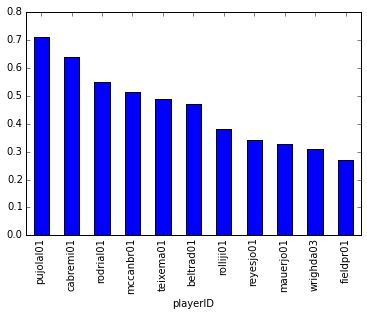

In [128]:
predicted_hof_active_df_mean['prob'].plot(kind='bar')

In [130]:
index = np.arange(len(predicted_hof_active_df_mean))

<Container object of 11 artists>

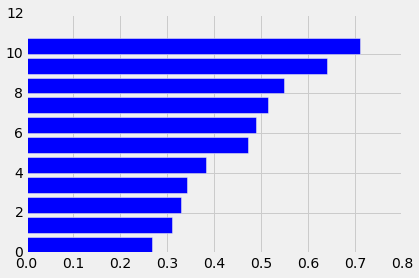

In [158]:
plt.barh(index, predicted_hof_active_df_mean['prob'])

In [153]:
predicted_hof_active_df_mean.index

Index([u'pujolal01', u'cabremi01', u'rodrial01', u'mccanbr01', u'teixema01',
       u'beltrad01', u'rolliji01', u'reyesjo01', u'mauerjo01', u'wrighda03',
       u'fieldpr01'],
      dtype='object', name=u'playerID')

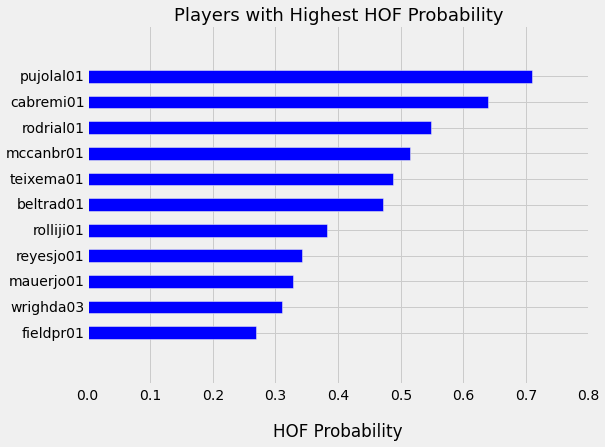

In [183]:
index = np.arange(len(predicted_hof_active_df_mean))

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8,6))
    plt.barh(index -.25, predicted_hof_active_df_mean['prob'], height=0.5)
    plt.title('Players with Highest HOF Probability', fontsize=18)
    labels = predicted_hof_active_df_mean.index
    plt.yticks(index, labels)
    plt.xlabel('HOF Probability', labelpad=20)
    plt.show()

In [138]:
rf03e2.feature_importances_

array([  2.11210808e-01,   1.71205847e-01,   9.09465017e-02,
         1.31812261e-01,   8.84219479e-02,   8.87754175e-02,
         5.81137934e-02,   1.55531805e-01,   5.66635327e-05,
         3.92495529e-03])

In [144]:
temp = zip(active_hitters_X3.columns, rf03e2.feature_importances_)

In [151]:
sorted(temp, key=lambda x: x[1], reverse=True)

[('R_ratio', 0.2112108076510805),
 ('H_ratio', 0.17120584691677965),
 ('yearID', 0.1555318051497967),
 ('RBI_ratio', 0.13181226092240469),
 ('HR_ratio', 0.090946501705497382),
 ('BB_ratio', 0.088775417511804358),
 ('SB_ratio', 0.088421947935500497),
 ('year', 0.058113793381217055),
 ('SB_filled', 0.0039249552931958651),
 ('RBI_filled', 5.6663532723228394e-05)]

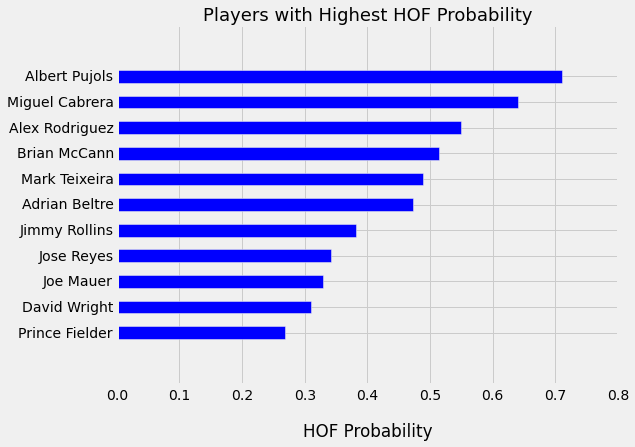

In [244]:
active_pred = rf03e2.predict(active_hitters_X3)
active_prob = rf03e2.predict_proba(active_hitters_X3)

active_hitters['pred'] = pd.Series(active_pred, index=active_hitters.index)
active_hitters['prob'] = pd.Series(active_prob[:,1], index=active_hitters.index)

predicted_hof_active = active_hitters[active_hitters['pred'] == 1]['name'].unique()
predicted_hof_active_df = active_hitters[active_hitters['name'].isin(predicted_hof_active)]

#predicted_hof_active_df[predicted_hof_active_df['yearID'] == 2015].sort_values(by='prob', ascending=False)

predicted_hof_active_df_mean = predicted_hof_active_df.groupby('name').mean().sort_values(by='prob')

# Bar chart of players with highest chances of making it to 
index = np.arange(len(predicted_hof_active_df_mean))

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8,6))
    plt.barh(index -.25, predicted_hof_active_df_mean['prob'], height=0.5)
    plt.title('Players with Highest HOF Probability', fontsize=18)
    labels = predicted_hof_active_df_mean.index
    plt.yticks(index, labels)
    plt.xlabel('HOF Probability', labelpad=20)
    plt.show()

In [237]:
predicted_hof_active_df.head(15)

,playerID,name,yearID,pred,prob
20593,cabremi01,Miguel Cabrera,2003,0,0.134545
20594,cabremi01,Miguel Cabrera,2004,0,0.185455
20595,cabremi01,Miguel Cabrera,2005,1,0.781818
20596,cabremi01,Miguel Cabrera,2006,1,0.727273
20597,cabremi01,Miguel Cabrera,2007,1,0.716364
20598,cabremi01,Miguel Cabrera,2008,1,0.767273
20599,cabremi01,Miguel Cabrera,2009,1,0.741818
20600,cabremi01,Miguel Cabrera,2010,1,0.756364
20601,cabremi01,Miguel Cabrera,2011,1,0.694545
20602,cabremi01,Miguel Cabrera,2012,1,0.712727


In [238]:
predicted_hof_active6_df.head(15)

,playerID,name,yearID,pred,prob
20593,cabremi01,Miguel Cabrera,2003,0,0.007273
20594,cabremi01,Miguel Cabrera,2004,1,0.694545
20595,cabremi01,Miguel Cabrera,2005,1,0.890909
20596,cabremi01,Miguel Cabrera,2006,1,0.880000
20597,cabremi01,Miguel Cabrera,2007,1,0.934545
20598,cabremi01,Miguel Cabrera,2008,1,0.952727
20599,cabremi01,Miguel Cabrera,2009,1,0.927273
20600,cabremi01,Miguel Cabrera,2010,1,0.978182
20601,cabremi01,Miguel Cabrera,2011,1,0.967273
20602,cabremi01,Miguel Cabrera,2012,1,0.992727


In [202]:
grouped = predicted_hof_active_df[['name', 'yearID', 'prob']].groupby(['name'])

Adrian Beltre
Albert Pujols
Alex Rodriguez
Brian McCann
David Wright
Jimmy Rollins
Joe Mauer
Jose Reyes
Mark Teixeira
Miguel Cabrera
Prince Fielder


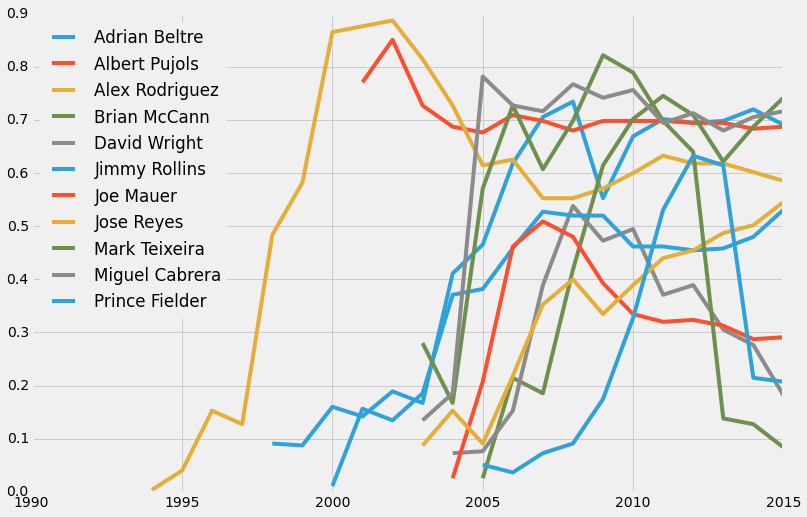

In [225]:
name_lst = []
yearID_lst = []
plt.figure(figsize=(12,8))
for name, df in grouped:
    print name
    name_lst.append(name)
#    print 'Name: ', name
#    print type(prob)
#    print 'Prob: ', prob
    plt.plot(df['yearID'], df['prob'])
#     yearID_lst.append(yearID)
#     prob_lst.append(prob)
plt.legend(name_lst, loc=2)

In [200]:
grouped_prob

Albert Pujols
Miguel Cabrera


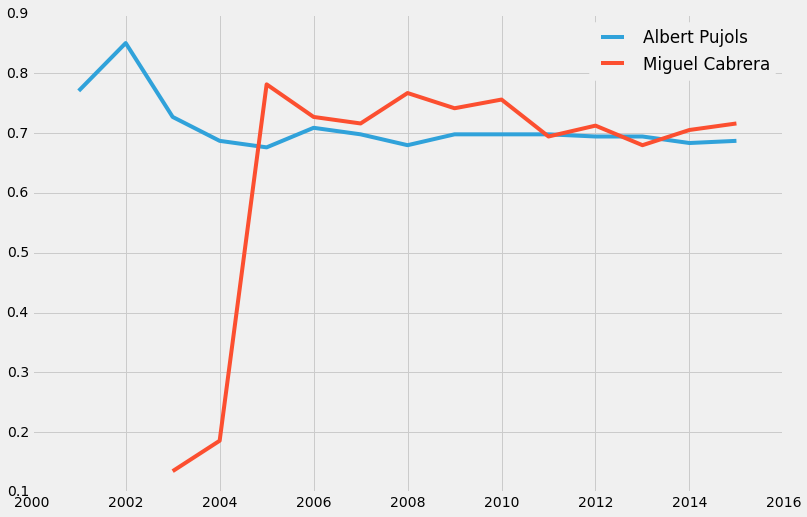

In [227]:
grouped = predicted_hof_active_df[['name', 'yearID', 'prob']].groupby(['name'])

name_lst = []
yearID_lst = []
plt.figure(figsize=(12,8))
for name, df in grouped:
    if name in ['Albert Pujols', 'Miguel Cabrera']:
        print name
        name_lst.append(name)
        plt.plot(df['yearID'], df['prob'])
plt.legend(name_lst, loc=1)

In [23]:
active_pred6 = rf06c.predict(active_hitters_X6)
active_prob6 = rf06c.predict_proba(active_hitters_X6)

active_hitters6['pred'] = pd.Series(active_pred6, index=active_hitters6.index)
active_hitters6['prob'] = pd.Series(active_prob6[:,1], index=active_hitters6.index)

predicted_hof_active6 = active_hitters6[active_hitters6['pred'] == 1]['name'].unique()
predicted_hof_active6_df = active_hitters6[active_hitters6['name'].isin(predicted_hof_active6)]

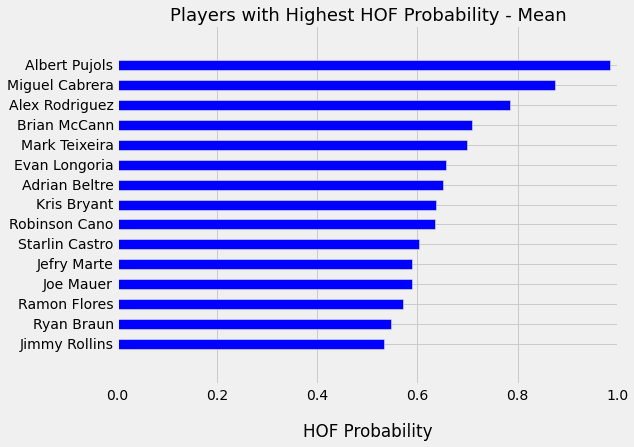

In [11]:
# Top mean probs

predicted_hof_active6_df_mean = predicted_hof_active6_df.groupby('name').mean().sort_values(by='prob')

# Bar chart of players with highest chances of making it to HOF
index = np.arange(len(predicted_hof_active6_df_mean.tail(15)))

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8,6))
    plt.barh(index -.25, predicted_hof_active6_df_mean['prob'].tail(15), height=0.5)
    plt.title('Players with Highest HOF Probability - Mean', fontsize=18)
    labels = predicted_hof_active6_df_mean.tail(15).index
    plt.yticks(index, labels)
    plt.xlabel('HOF Probability', labelpad=20)
    plt.show()

In [307]:
predicted_hof_active6_df[predicted_hof_active6_df['yearID'] == 2015].sort_values(by='prob', ascending=False)

,playerID,name,yearID,pred,prob
24269,pujolal01,Albert Pujols,2015,1,0.981818
20605,cabremi01,Miguel Cabrera,2015,1,0.978182
46185,rodrial01,Alex Rodriguez,2015,1,0.963636
36989,mccanbr01,Brian McCann,2015,1,0.894545
48072,beltrad01,Adrian Beltre,2015,1,0.869091
17284,suzukic01,Ichiro Suzuki,2015,1,0.850909
42471,castrst01,Starlin Castro,2015,1,0.734545
26346,canoro01,Robinson Cano,2015,1,0.712727
36919,mauerjo01,Joe Mauer,2015,1,0.705455
5746,florera02,Ramon Flores,2015,1,0.698182


In [296]:
predicted_hof_active6_df_mean.tail(15).index

Index([u'Jimmy Rollins', u'Elvis Andrus', u'Hanley Ramirez', u'Kris Bryant',
       u'Starlin Castro', u'Joe Mauer', u'Robinson Cano', u'Adrian Beltre',
       u'Mark Teixeira', u'Evan Longoria', u'Ramon Flores', u'Brian McCann',
       u'Alex Rodriguez', u'Miguel Cabrera', u'Albert Pujols'],
      dtype='object', name=u'name')

In [292]:
predicted_hof_active6_df_mean.tail(15)

,yearID,pred,prob
name,,,
Jimmy Rollins,2007.500000,0.750000,0.530000
Elvis Andrus,2012.000000,0.857143,0.531948
Hanley Ramirez,2010.000000,0.727273,0.538233
Kris Bryant,2015.000000,1.000000,0.596364
Starlin Castro,2012.500000,0.666667,0.601212
Joe Mauer,2009.500000,0.833333,0.601515
Robinson Cano,2010.000000,0.636364,0.613884
Adrian Beltre,2006.500000,0.666667,0.623636
Mark Teixeira,2009.000000,0.615385,0.669091


In [279]:
predicted_hof_active6_df_mean

,yearID,pred,prob
name,,,
Reid Brignac,2011.500000,0.125000,0.095537
Josh Wilson,2010.500000,0.125000,0.128182
Nelson Cruz,2010.000000,0.090909,0.134876
Edwin Encarnacion,2010.000000,0.181818,0.185455
Jason Pridie,2011.714286,0.142857,0.185462
David Ortiz,2006.000000,0.052632,0.201722
Ryan Goins,2014.000000,0.333333,0.214545
Justin Morneau,2009.000000,0.153846,0.214825
Chase Utley,2009.000000,0.076923,0.231329


In [278]:
predicted_hof_active6_df_mean['prob']

name
Reid Brignac         0.095537
Josh Wilson          0.128182
Nelson Cruz          0.134876
Edwin Encarnacion    0.185455
Jason Pridie         0.185462
David Ortiz          0.201722
Ryan Goins           0.214545
Justin Morneau       0.214825
Chase Utley          0.231329
Buster Posey         0.233247
A. J. Pierzynski     0.240202
Grady Sizemore       0.242909
Jonathan Diaz        0.248808
Aramis Ramirez       0.253535
Matt Holliday        0.284545
Nolan Arenado        0.298182
Gregorio Petit       0.300000
Jose Altuve          0.310545
Billy Butler         0.334545
Mike Trout           0.335273
Ichiro Suzuki        0.337939
Victor Martinez      0.342657
Austin Jackson       0.343030
Nick Markakis        0.343636
Troy Tulowitzki      0.345455
Carlos Beltran       0.370505
Salvador Perez       0.385455
Dan Uggla            0.393818
Carl Crawford        0.435065
Ian Kinsler          0.443636
David Wright         0.449091
Jose Reyes           0.451189
Russell Martin       0.451273
Princ

In [340]:
predicted_hof_active6_df_max = predicted_hof_active6_df.groupby('name').max().sort_values(by='prob', ascending=False)


In [341]:
predicted_hof_active6_df_max

,playerID,yearID,pred,prob
name,,,,
Albert Pujols,pujolal01,2015,1,1.000000
Miguel Cabrera,cabremi01,2015,1,0.992727
Alex Rodriguez,rodrial01,2015,1,0.981818
Brian McCann,mccanbr01,2015,1,0.912727
Adrian Beltre,beltrad01,2015,1,0.909091
Mark Teixeira,teixema01,2015,1,0.905455
Ichiro Suzuki,suzukic01,2015,1,0.850909
Prince Fielder,fieldpr01,2015,1,0.832727
Joe Mauer,mauerjo01,2015,1,0.832727


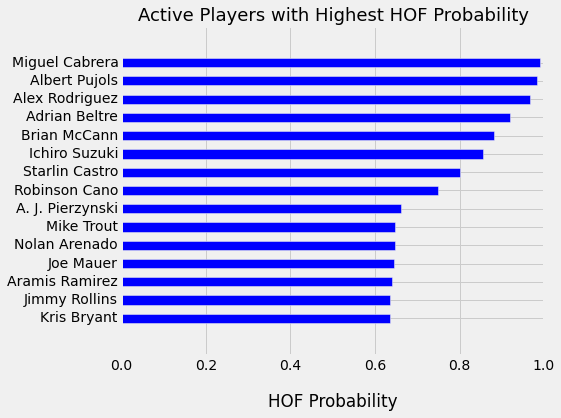

In [12]:
# Top probs at current year

#predicted_hof_active6_df_mean = predicted_hof_active6_df.groupby('name').mean().sort_values(by='prob')
predicted_hof_active6_df_lastyr = predicted_hof_active6_df[predicted_hof_active6_df['yearID'] == 2015]\
.sort_values(by='prob')

# Bar chart of players with highest chances of making it to 
index = np.arange(len(predicted_hof_active6_df_lastyr.tail(15)))

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8,6))
    plt.barh(index -.25, predicted_hof_active6_df_lastyr['prob'].tail(15), height=0.5, color='b')
    plt.title('Active Players with Highest HOF Probability', fontsize=18)
    labels = predicted_hof_active6_df_lastyr['name'].tail(15).values
    plt.yticks(index, labels)
    plt.xlabel('HOF Probability', labelpad=20)
    plt.tight_layout()
    plt.savefig('Top15_latest_yr_2.png', transparent=True)
    plt.show()

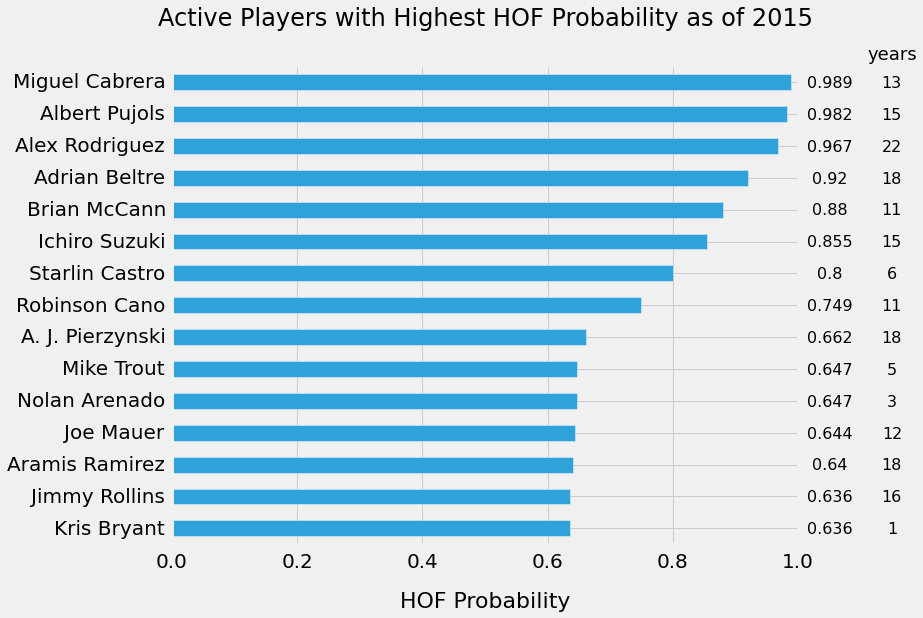

In [26]:
# Top probs at current year

#predicted_hof_active6_df_mean = predicted_hof_active6_df.groupby('name').mean().sort_values(by='prob')
predicted_hof_active6_df_lastyr = predicted_hof_active6_df[predicted_hof_active6_df['yearID'] == 2015]\
.sort_values(by='prob')

# Bar chart of players with highest chances of making it to 
index = np.arange(len(predicted_hof_active6_df_lastyr.tail(15)))

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10,8))
#    matplotlib.rcParams['figure.figsize'] = 9, 7
    ax = predicted_hof_active6_df_lastyr['prob'].tail(15).plot(kind='barh', fontsize=20)
    ax.set_ylabel('')
        
    yrs_played = [yr for yr in predicted_hof_active6_df_lastyr['year'].tail(15)]
    probs = [round(prob, 3) for prob in predicted_hof_active6_df_lastyr['prob'].tail(15)]

    rects = ax.patches
    yticks_pos = []
    for rect, prob, yr in zip(rects, probs, yrs_played):
        width = rect.get_width()
#        ax.text(rect.get_x() + width + 0.065, rect.get_y(), prob, ha='center', va='bottom', fontsize=16)
        ax.text(1.05, rect.get_y(), prob, ha='center', va='bottom', fontsize=16)

        ax.text(1.15, rect.get_y(), yr, ha='center', va='bottom', fontsize=16)
        yticks_pos.append(rect.get_y() + rect.get_height()/2)

        # rect.get_height()/4
    ax.text(1.15, 14.6, 'years', ha='center', va='bottom', fontsize=18)
    ax.set_title('Active Players with Highest HOF Probability as of 2015', fontsize=24)
    ax.title.set_position((0.5, 1.075))

    labels = predicted_hof_active6_df_lastyr['name'].tail(15).values
    plt.xlabel('HOF Probability', labelpad=20, fontsize=22)

#    xticks_pos = [rect.get_height() - 0.5 ] for patch in rects]

    plt.yticks(index, labels)
    plt.yticks(yticks_pos, ha='right')
    plt.tick_params(axis='both', which='major', pad=7.5)
#    plt.tight_layout(pad=0.5, w_pad=0.2, h_pad=0.2)
    a = plt.gca()
#    a.set_frame_on(False)
    plt.savefig('Top15_latest_yr_2.png', transparent=True, dpi=(150), bbox_inches='tight')
    plt.show()
    


In [17]:
predicted_hof_active6_df_lastyr[['playerID', 'year']].tail(15)

,playerID,year
48461,bryankr01,1
46244,rolliji01,16
52095,ramirar01,18
36919,mauerjo01,12
47772,arenano01,3
17916,troutmi01,5
38554,pierzaj01,18
26346,canoro01,11
42471,castrst01,6
17284,suzukic01,15


In [329]:
predicted_hof_active6_df_lastyr['name'].tail(15).values

array(['Buster Posey', 'A. J. Pierzynski', 'Jose Altuve', 'Evan Longoria',
       'Mike Trout', 'Ramon Flores', 'Joe Mauer', 'Robinson Cano',
       'Starlin Castro', 'Ichiro Suzuki', 'Adrian Beltre', 'Brian McCann',
       'Alex Rodriguez', 'Miguel Cabrera', 'Albert Pujols'], dtype=object)

In [322]:
predicted_hof_active6_df_lastyr.tail(15)

,playerID,name,yearID,pred,prob
38640,poseybu01,Buster Posey,2015,1,0.618182
38554,pierzaj01,A. J. Pierzynski,2015,1,0.629091
25682,altuvjo01,Jose Altuve,2015,1,0.650909
50985,longoev01,Evan Longoria,2015,1,0.676364
17916,troutmi01,Mike Trout,2015,1,0.683636
5746,florera02,Ramon Flores,2015,1,0.698182
36919,mauerjo01,Joe Mauer,2015,1,0.705455
26346,canoro01,Robinson Cano,2015,1,0.712727
42471,castrst01,Starlin Castro,2015,1,0.734545
17284,suzukic01,Ichiro Suzuki,2015,1,0.850909


In [387]:
predicted_hof_active6_df_lastyr['prob'].tail(6)

17284    0.850909
48072    0.869091
36989    0.894545
46185    0.963636
20605    0.978182
24269    0.981818
Name: prob, dtype: float64

In [390]:
predicted_hof_active6_df_lastyr['name'].tail(6).values

array(['Ichiro Suzuki', 'Adrian Beltre', 'Brian McCann', 'Alex Rodriguez',
       'Miguel Cabrera', 'Albert Pujols'], dtype=object)

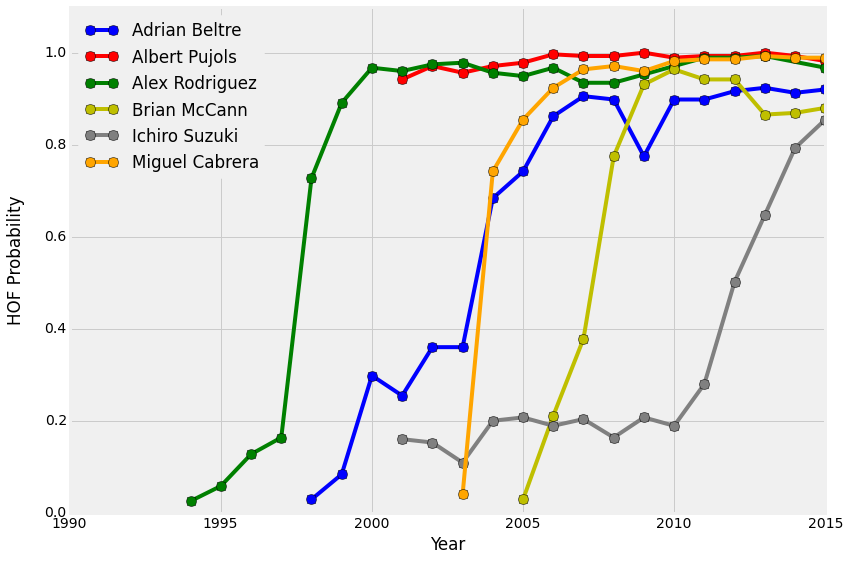

In [27]:
grouped6 = predicted_hof_active6_df[['name', 'yearID', 'prob']].groupby(['name'])

name_lst = []
plt.figure(figsize=(12,8))
colors = ['b', 'r', 'g', 'y', 'gray', 'orange']
i = 0
with plt.style.context('fivethirtyeight'):
    for name, df in grouped6:
        if name in predicted_hof_active6_df_lastyr['name'].tail(6).values:
            name_lst.append(name)
            plt.plot(df['yearID'], df['prob'], '-o', markersize=10, color=colors[i])
            #color=colors[i]
            plt.ylim(0, 1.1)

            plt.xlabel('Year')
            plt.ylabel('HOF Probability', labelpad=20)
            plt.tight_layout()
            i += 1
    plt.legend(name_lst, loc=2)
    plt.savefig('Top6_career_2.png', transparent=True)
    plt.show()

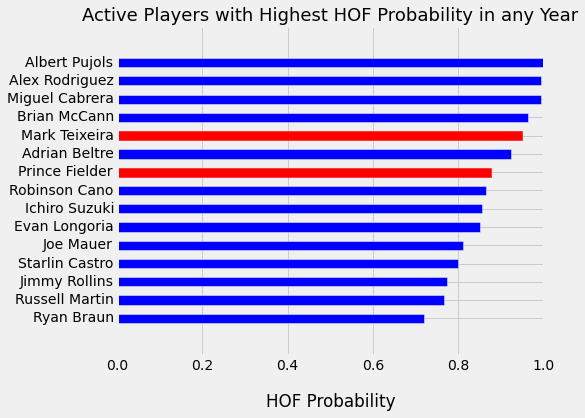

In [28]:
# Max probs at whichever year

predicted_hof_active6_df_max = predicted_hof_active6_df.groupby('name').max().sort_values(by='prob')

# Bar chart of players with highest chances of making it to 
index = np.arange(len(predicted_hof_active6_df_max.tail(15)))

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8,6))
    barlst = plt.barh(index -.25, predicted_hof_active6_df_max['prob'].tail(15), height=0.5)
    barlst[8].set_color('r')
    barlst[10].set_color('r')
    
    plt.title('Active Players with Highest HOF Probability in any Year ', fontsize=18)
    labels = predicted_hof_active6_df_max.tail(15).index
    plt.yticks(index, labels)
    plt.xlabel('HOF Probability', labelpad=20)
    plt.tight_layout()
    plt.savefig('Top15_any_yr_2.png', transparent=True)
    plt.show()

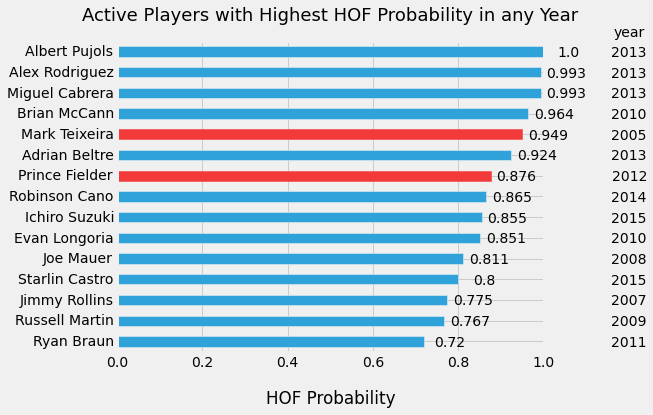

In [155]:
# Max probs at whichever year

# predicted_hof_active6_df_max = predicted_hof_active6_df.groupby('name').max().sort_values(by='prob')

idx = predicted_hof_active6_df.groupby('name')['prob'].transform(max) == predicted_hof_active6_df['prob']

predicted_hof_active6_df_max = predicted_hof_active6_df[idx].groupby('name').max().sort_values(by='prob')

# Bar chart of players with highest chances of making it to 
index = np.arange(len(predicted_hof_active6_df_max.tail(15)))

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8,6))
#     barlst = plt.barh(index -.25, predicted_hof_active6_df_max['prob'].tail(15), height=0.5)
#     barlst[8].set_color('r')
#     barlst[10].set_color('r')
    
    ax = predicted_hof_active6_df_max['prob'].tail(15).plot(kind='barh')
    ax.set_ylabel('')
    
    rects = ax.patches
    rects[8].set_color('#F23A3A')
    rects[10].set_color('#F23A3A')
    #    rects[10].set_color('#E63535')

    yrs = [yr for yr in predicted_hof_active6_df_max['yearID'].tail(15)]
    probs = [round(prob, 3) for prob in predicted_hof_active6_df_max['prob'].tail(15)]

    for rect, prob, yr in zip(rects, probs, yrs):
        width = rect.get_width()
#         ax.text(rect.get_x() + width + 0.075, rect.get_y() - rect.get_height()/4, label, ha='center', va='bottom')
        ax.text(rect.get_x() + width + 0.06, rect.get_y() - rect.get_height()/4, prob, ha='center', va='bottom')
        ax.text(1.2, rect.get_y() - rect.get_height()/4, yr, ha='center', va='bottom')

    ax.text(1.2, 14.6, 'year', ha='center', va='bottom')
    ax.set_title('Active Players with Highest HOF Probability in any Year ', fontsize=18)
    ax.title.set_position((0.5, 1.05))
#    labels = predicted_hof_active6_df_max.tail(15).index
#    plt.yticks(index, labels)
    plt.xlabel('HOF Probability', labelpad=20)
    plt.tight_layout()
    plt.savefig('Top15_any_yr_2.png', transparent=True)
    plt.show()

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# frequencies = [6, 16, 75, 160, 244, 260, 145, 73, 16, 4, 1]   # bring some raw data

# freq_series = pd.Series.from_array(frequencies)   # in my original code I create a series and run on that, so for consistency I create a series from the list.

# x_labels = [108300.0, 110540.0, 112780.0, 115020.0, 117260.0, 119500.0, 121740.0, 123980.0, 126220.0, 128460.0, 130700.0]
    
# # now to plot the figure...
# plt.figure(figsize=(12, 8))
# ax = freq_series.plot(kind='bar')
# ax.set_title("Amount Frequency")
# ax.set_xlabel("Amount ($)")
# ax.set_ylabel("Frequency")
# ax.set_xticklabels(x_labels)

# rects = ax.patches

# # Now make some labels
# labels = ["label%d" % i for i in xrange(len(rects))]

# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')


In [100]:
len(ax.patches)

15

In [101]:
len(labels)

15

In [59]:
predicted_hof_active6_df_max.tail(5)

,playerID,yearID,pred,prob
name,,,,
Mark Teixeira,teixema01,2015,1,0.949091
Brian McCann,mccanbr01,2015,1,0.963636
Miguel Cabrera,cabremi01,2015,1,0.992727
Alex Rodriguez,rodrial01,2015,1,0.992727
Albert Pujols,pujolal01,2015,1,1.000000


In [62]:
predicted_hof_active6_df.groupby('name').max().sort_values(by='prob')

,playerID,yearID,pred,prob
name,,,,
Buster Posey,poseybu01,2015,1,0.501818
Manny Machado,machama01,2015,1,0.501818
Gregorio Petit,petitgr01,2015,1,0.501818
Nelson Cruz,cruzne02,2015,1,0.505455
Conor Gillaspie,gillaco01,2015,1,0.505455
Jonathan Diaz,diazjo02,2015,1,0.509590
Carlos Beltran,beltrca01,2015,1,0.523636
Edwin Encarnacion,encared01,2015,1,0.527273
Justin Morneau,morneju01,2015,1,0.545455


In [68]:
predicted_hof_active6_df.groupby('name')['prob'].idmax()

AttributeError: Cannot access callable attribute 'argmax' of 'SeriesGroupBy' objects, try using the 'apply' method

In [71]:
idx = predicted_hof_active6_df.groupby('name')['prob'].transform(max) == predicted_hof_active6_df['prob']

In [72]:
idx

1050     False
1051     False
1052     False
1053     False
1054     False
1055     False
1056     False
1057     False
1058     False
1059     False
1060      True
1061     False
1062     False
1063     False
1064     False
1065     False
1066     False
1067     False
1746     False
1747     False
1748     False
1749     False
1750      True
1751     False
1752     False
1753     False
1754     False
3862     False
3863     False
3864     False
         ...  
52090    False
52091    False
52092     True
52093    False
52094    False
52095    False
52178    False
52179     True
52180    False
52190    False
52191    False
52192    False
52193    False
52194    False
52195    False
52196    False
52197     True
52198    False
53422    False
53423    False
53424    False
53425    False
53426     True
53427    False
53428    False
53429    False
53430    False
53431    False
53432    False
53433    False
dtype: bool

In [82]:
predicted_hof_active6_df[idx].groupby('name').max().sort_values(by='prob', ascending=False)

,playerID,yearID,pred,prob
name,,,,
Albert Pujols,pujolal01,2013,1,1.000000
Alex Rodriguez,rodrial01,2013,1,0.992727
Miguel Cabrera,cabremi01,2013,1,0.992727
Brian McCann,mccanbr01,2010,1,0.963636
Mark Teixeira,teixema01,2005,1,0.949091
Adrian Beltre,beltrad01,2013,1,0.923636
Prince Fielder,fieldpr01,2012,1,0.876364
Robinson Cano,canoro01,2014,1,0.865455
Ichiro Suzuki,suzukic01,2015,1,0.854545


In [77]:
predicted_hof_active6_df_max.sort_values(by='prob', ascending=False)

,playerID,yearID,pred,prob
name,,,,
Albert Pujols,pujolal01,2015,1,1.000000
Alex Rodriguez,rodrial01,2015,1,0.992727
Miguel Cabrera,cabremi01,2015,1,0.992727
Brian McCann,mccanbr01,2015,1,0.963636
Mark Teixeira,teixema01,2015,1,0.949091
Adrian Beltre,beltrad01,2015,1,0.923636
Prince Fielder,fieldpr01,2015,1,0.876364
Robinson Cano,canoro01,2015,1,0.865455
Ichiro Suzuki,suzukic01,2015,1,0.854545


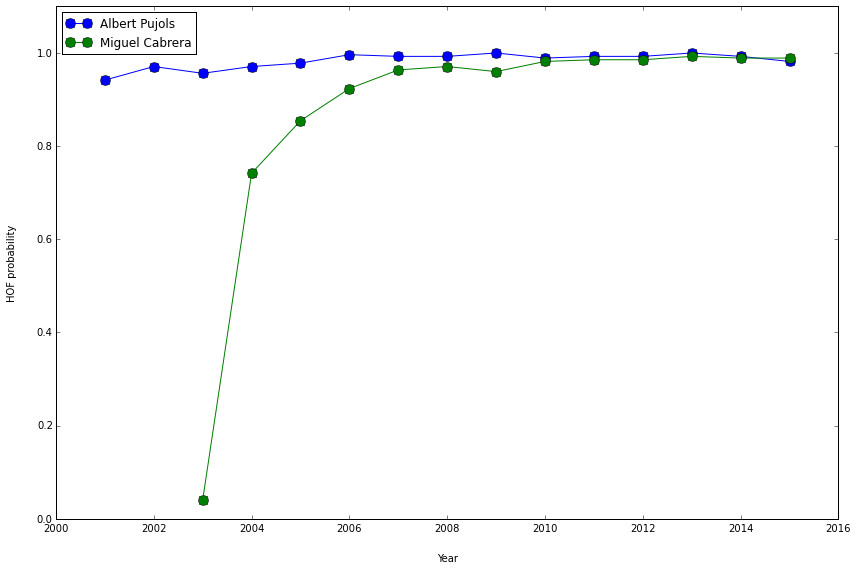

In [15]:
grouped6 = predicted_hof_active6_df[['name', 'yearID', 'prob']].groupby(['name'])

name_lst = []
plt.figure(figsize=(12,8))
for name, df in grouped6:
    if name in ['Albert Pujols', 'Miguel Cabrera']:
        name_lst.append(name)
        plt.plot(df['yearID'], df['prob'], '-o', markersize=10)
        plt.xlabel('Year', labelpad=20)
        plt.ylabel('HOF probability', labelpad=20)
        plt.ylim(0, 1.1)
        plt.tight_layout()
        plt.legend(name_lst, loc=0)

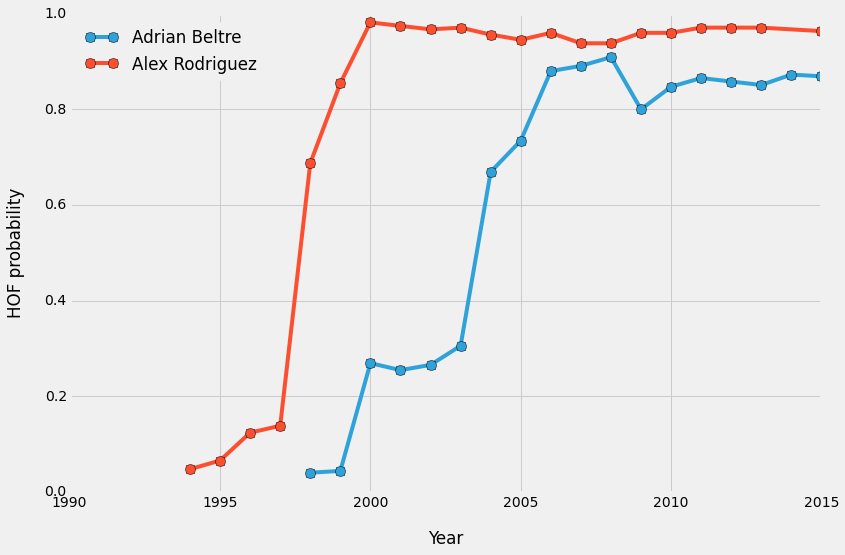

In [354]:
grouped6 = predicted_hof_active6_df[['name', 'yearID', 'prob']].groupby(['name'])

name_lst = []
plt.figure(figsize=(12,8))
for name, df in grouped6:
    if name in ['Adrian Beltre', 'Alex Rodriguez']:
        name_lst.append(name)
        plt.plot(df['yearID'], df['prob'], '-o', markersize=10)
        plt.xlabel('Year', labelpad=20)
        plt.ylabel('HOF probability', labelpad=20)
        
        plt.legend(name_lst, loc=2)

In [148]:
import pylab

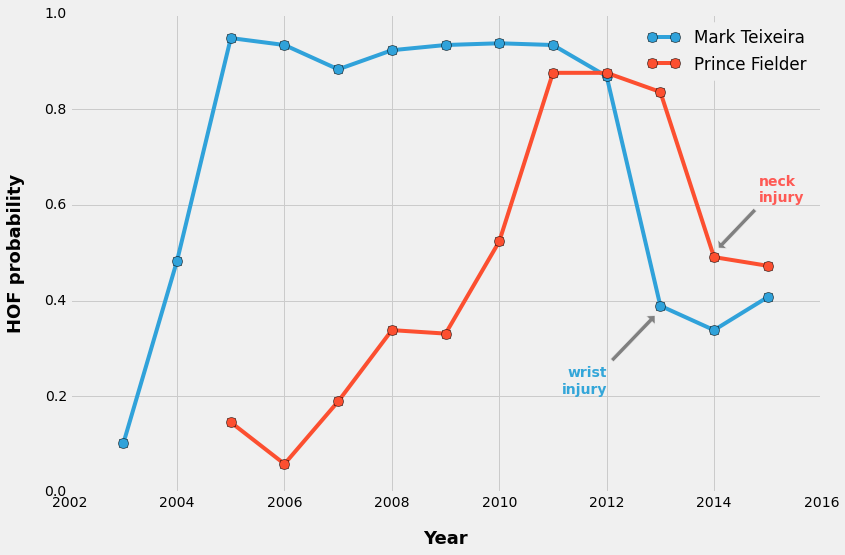

In [278]:
grouped6 = predicted_hof_active6_df[['name', 'yearID', 'prob']].groupby(['name'])

name_lst = []
with plt.style.context('fivethirtyeight'):

    plt.figure(figsize=(12,8))
    for name, df in grouped6:
        if name in ['Mark Teixeira', 'Prince Fielder']:
            name_lst.append(name)
            plt.plot(df['yearID'], df['prob'], '-o', markersize=10)
            plt.xlabel('Year', labelpad=20, fontsize=18, weight='semibold')
            plt.ylabel('HOF probability', labelpad=20, fontsize=18, weight='semibold')
#    plt.axvline(x=2013, ymax=0.38, c='0.3', linestyle='--', linewidth=1.5)
    # P.arrow( x, y, dx, dy, **kwargs )
#     P.arrow( 0.5, 0.8, 0.0, -0.2, fc="k", ec="k",
#     head_width=0.05, head_length=0.1 )
#     P.show()

#    plt.arrow(2012,0.5,0.5,0.5, shape='full', lw=5, length_includes_head=True, head_width=.01)
#    plt.set_facecolor('b')

#    arr = pylab.Arrow(2012, 0.25, 1, 0, edgecolor='white')

    # Get the subplot that we are currently working on
    ax = plt.gca()
    # Now add the arrow
#    ax.add_patch(arr)
    # We should be able to make modifications to the arrow.
    # Lets make it green.
#    arr.set_facecolor('g')

#     bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="cyan", ec="b", lw=2)
#     t = ax.text(0, 0, "Direction", ha="center", va="center", rotation=45,
#             size=15,
#             bbox=bbox_props)

    ax.annotate('wrist\ninjury', xy=(2013, 0.38), xycoords='data',
                xytext=(2012, 0.2), textcoords='data',
                arrowprops=dict(facecolor='0.5', shrink=0.1),
                horizontalalignment='right', verticalalignment='bottom',
                color=(0.2, 0.65, 0.85), fontsize=14, weight='semibold')

    ax.annotate('neck\ninjury', xy=(2014, 0.5), xycoords='data',
                xytext=(2014.85, 0.6), textcoords='data',
                arrowprops=dict(facecolor='0.5', shrink=0.1),
                horizontalalignment='left', verticalalignment='bottom',
                color=(1, 0.35, 0.33), fontsize=14, weight='semibold')

# textcoords='axes fraction'
# shrink=0.1,
# xytext=(2012, 0.2)
# horizontalalignment='right'
# color=(0, 0.65, 0.85)
# color=(0.85, 0.35, 0.33)
    plt.legend(name_lst, loc=0)
    plt.savefig('Injury_toll.png', transparent=True)

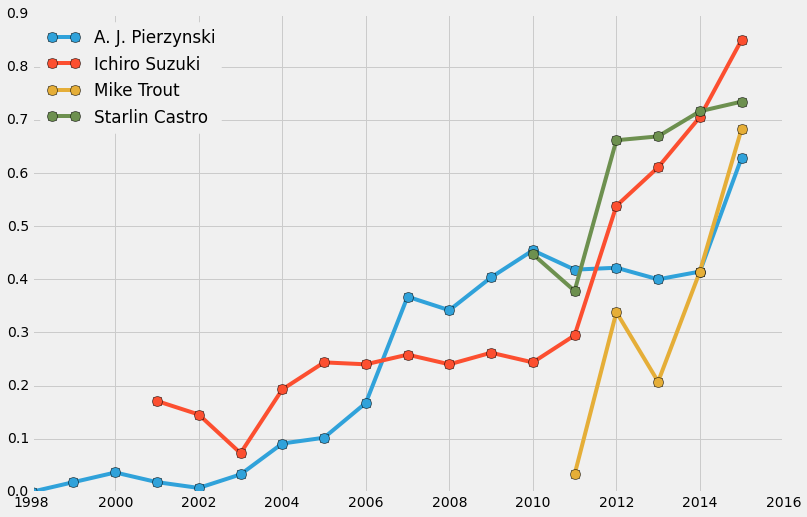

In [323]:
grouped6 = predicted_hof_active6_df[['name', 'yearID', 'prob']].groupby(['name'])

name_lst = []
plt.figure(figsize=(12,8))
for name, df in grouped6:
    if name in ['Mike Trout', 'Ichiro Suzuki', 'Starlin Castro', 'A. J. Pierzynski']:
        name_lst.append(name)
        plt.plot(df['yearID'], df['prob'], '-o', markersize=10)
        
plt.legend(name_lst, loc=2)

In [281]:
grouped6['name'].unique()

name
A. J. Pierzynski      [A. J. Pierzynski]
Adrian Beltre            [Adrian Beltre]
Albert Pujols            [Albert Pujols]
Alex Rodriguez          [Alex Rodriguez]
Aramis Ramirez          [Aramis Ramirez]
Austin Jackson          [Austin Jackson]
Billy Butler              [Billy Butler]
Brian McCann              [Brian McCann]
Buster Posey              [Buster Posey]
Carl Crawford            [Carl Crawford]
Carlos Beltran          [Carlos Beltran]
Chase Utley                [Chase Utley]
Dan Uggla                    [Dan Uggla]
David Ortiz                [David Ortiz]
David Wright              [David Wright]
Edwin Encarnacion    [Edwin Encarnacion]
Elvis Andrus              [Elvis Andrus]
Evan Longoria            [Evan Longoria]
Grady Sizemore          [Grady Sizemore]
Gregorio Petit          [Gregorio Petit]
Hanley Ramirez          [Hanley Ramirez]
Ian Kinsler                [Ian Kinsler]
Ichiro Suzuki            [Ichiro Suzuki]
Jason Pridie              [Jason Pridie]
Jimmy Rolli

In [272]:
active_hitters6[active_hitters6['pred'] == 1]['name'].unique()

array(['Carlos Beltran', 'Ryan Braun', 'Carl Crawford', 'Nelson Cruz',
       'Ramon Flores', 'Matt Holliday', 'Austin Jackson', 'Nick Markakis',
       'Jason Pridie', 'Grady Sizemore', 'Ichiro Suzuki', 'Mike Trout',
       'Billy Butler', 'Miguel Cabrera', 'Prince Fielder',
       'Justin Morneau', 'David Ortiz', 'Albert Pujols', 'Mark Teixeira',
       'Jose Altuve', 'Robinson Cano', 'Ryan Goins', 'Ian Kinsler',
       'Gregorio Petit', 'Dan Uggla', 'Chase Utley', 'Russell Martin',
       'Victor Martinez', 'Joe Mauer', 'Brian McCann', 'Salvador Perez',
       'A. J. Pierzynski', 'Buster Posey', 'Elvis Andrus', 'Reid Brignac',
       'Starlin Castro', 'Jonathan Diaz', 'Hanley Ramirez', 'Jose Reyes',
       'Alex Rodriguez', 'Jimmy Rollins', 'Troy Tulowitzki', 'Josh Wilson',
       'Nolan Arenado', 'Adrian Beltre', 'Kris Bryant',
       'Edwin Encarnacion', 'Evan Longoria', 'Aramis Ramirez',
       'Mark Reynolds', 'David Wright'], dtype=object)

In [273]:
active_hitters6[active_hitters6['name'] == 'Mark Reynolds']

,playerID,name,yearID,pred,prob
52190,reynoma01,Mark Reynolds,2007,0,0.250909
52191,reynoma01,Mark Reynolds,2008,0,0.407273
52192,reynoma01,Mark Reynolds,2009,1,0.509091
52193,reynoma01,Mark Reynolds,2010,1,0.570909
52194,reynoma01,Mark Reynolds,2011,1,0.552727
52195,reynoma01,Mark Reynolds,2012,1,0.570909
52196,reynoma01,Mark Reynolds,2013,1,0.654545
52197,reynoma01,Mark Reynolds,2014,1,0.552727
52198,reynoma01,Mark Reynolds,2015,0,0.436364


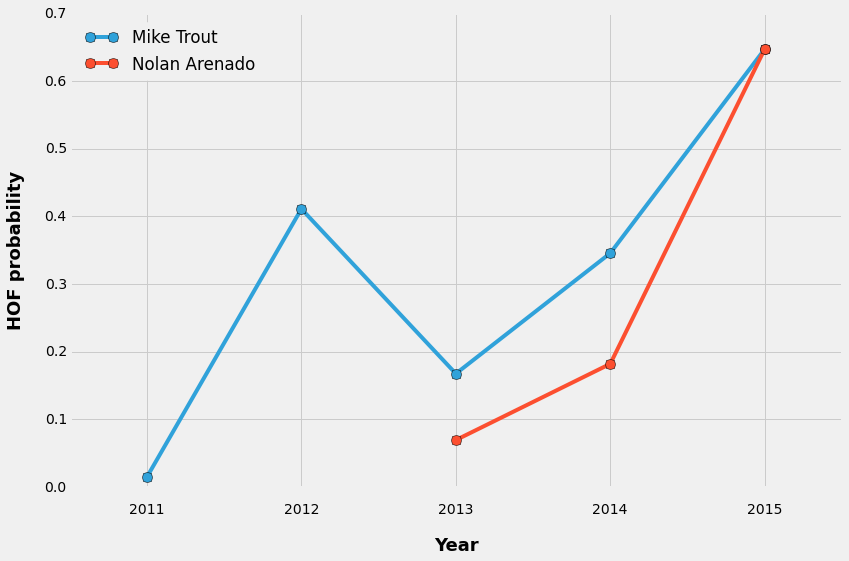

In [322]:
name_lst = []
yearID_lst = []
with plt.style.context('fivethirtyeight'):

    plt.figure(figsize=(12,8))
    for name, df in grouped6:
        if name in ['Mike Trout', 'Nolan Arenado']:
            #print df
            name_lst.append(name)
            yearID_lst.append(list(df['yearID'].values))
            plt.plot(df['yearID'], df['prob'], '-o', markersize=10)
    yearIDs = list(set([yearID for i in yearID_lst for yearID in i]))
    ax= plt.gca()
    plt.xticks(np.arange(min(yearIDs), max(yearIDs) + 1, 1))
    ax.set_xticklabels(yearIDs)
    ax.tick_params(axis='x', which='major', pad=15)
    ax.set_xlim(2010.5, 2015.5)
    plt.xlabel('Year', labelpad=20, fontsize=18, weight='semibold')
    plt.ylabel('HOF probability', labelpad=20, fontsize=18, weight='semibold')
    plt.legend(name_lst, loc=0)
    plt.tight_layout()
    plt.savefig('Early_career.png', transparent=True)

In [31]:
ls

2_Explore_Clean_Data_Pt2.ipynb     Xmax_features_hitters.pkl
Build_Model_v1.ipynb               active_hitters.pkl
Build_Model_v2.ipynb               active_hitters_X1.pkl
Build_Model_v3.ipynb               active_hitters_X2.pkl
Build_Model_v4.ipynb               active_hitters_X3.pkl
Build_Model_v4_copy.ipynb          active_hitters_X4.pkl
Early_career.png                   active_hitters_X6.pkl
Explore_Clean_Data.ipynb           active_hitters_X_4.pkl
Explore_Clean_Data_v10.ipynb       active_hitters_ratios.pkl
Explore_Clean_Data_v11.ipynb       eligible_hitters_X1.pkl
Explore_Clean_Data_v2.ipynb        eligible_hitters_X2.pkl
Explore_Clean_Data_v3.ipynb        eligible_hitters_X3.pkl
Explore_Clean_Data_v4.ipynb        eligible_hitters_X4.pkl
Explore_Clean_Data_v5.ipynb        eligible_hitters_X5.pkl
Explore_Clean_Data_v6.ipynb        eligible_hitters_X6.pkl
Explore_Clean_Data_v7.ipynb        eligible_hitters_y.pkl
Explore_Clean_Data_v8.ipynb        plot_unbalanced_dataset.ipynb.txt


In [32]:
frequencies = [6, 16, 75, 160, 244, 260, 145, 73, 16, 4, 1]

In [33]:
freq_series = pd.Series.from_array(frequencies)

In [34]:
freq_series

0       6
1      16
2      75
3     160
4     244
5     260
6     145
7      73
8      16
9       4
10      1
dtype: int64

## rf07b model w/ data 7 graphs

In [12]:
active_pred7 = rf07b.predict(active_hitters_X7)
active_prob7 = rf07b.predict_proba(active_hitters_X7)

active_hitters7['pred'] = pd.Series(active_pred7, index=active_hitters7.index)
active_hitters7['prob'] = pd.Series(active_prob7[:,1], index=active_hitters7.index)

predicted_hof_active7 = active_hitters7[active_hitters7['pred'] == 1]['name'].unique()
predicted_hof_active7_df = active_hitters7[active_hitters7['name'].isin(predicted_hof_active7)]

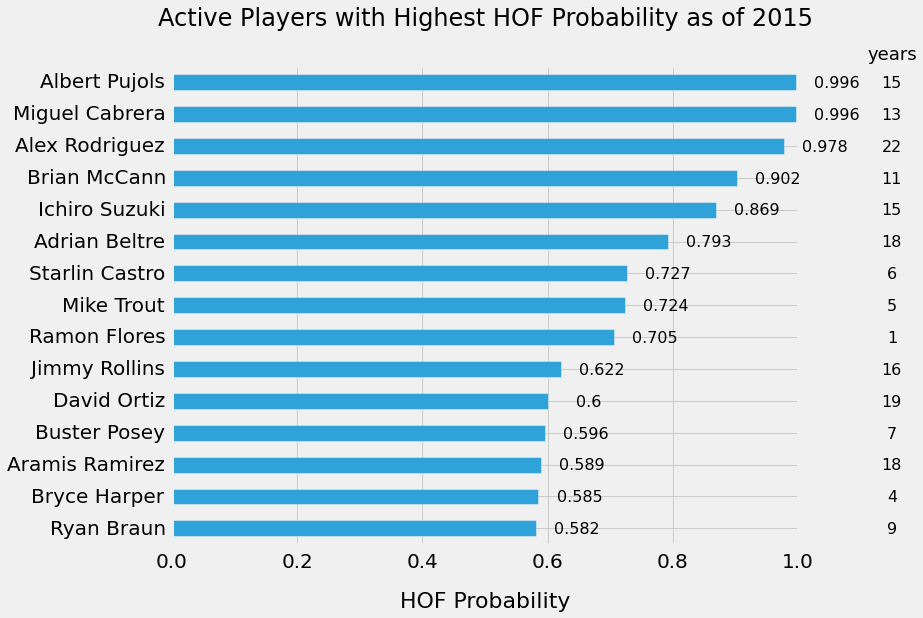

In [39]:
# Top probs at current year

#predicted_hof_active6_df_mean = predicted_hof_active6_df.groupby('name').mean().sort_values(by='prob')
predicted_hof_active7_df_lastyr = predicted_hof_active7_df[predicted_hof_active7_df['yearID'] == 2015]\
.sort_values(by='prob')

# Bar chart of players with highest chances of making it to 
index = np.arange(len(predicted_hof_active7_df_lastyr.tail(15)))

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10,8))
#    matplotlib.rcParams['figure.figsize'] = 9, 7
    ax = predicted_hof_active7_df_lastyr['prob'].tail(15).plot(kind='barh', fontsize=20)
    ax.set_ylabel('')
        
    yrs_played = [yr for yr in predicted_hof_active7_df_lastyr['year'].tail(15)]
    probs = [round(prob, 3) for prob in predicted_hof_active7_df_lastyr['prob'].tail(15)]

    rects = ax.patches
    yticks_pos = []
    for rect, prob, yr in zip(rects, probs, yrs_played):
        width = rect.get_width()
        ax.text(rect.get_x() + width + 0.065, rect.get_y(), prob, ha='center', va='bottom', fontsize=16)
#        ax.text(1.05, rect.get_y(), prob, ha='center', va='bottom', fontsize=16)

        ax.text(1.15, rect.get_y(), yr, ha='center', va='bottom', fontsize=16)
        yticks_pos.append(rect.get_y() + rect.get_height()/2)

        # rect.get_height()/4
    ax.text(1.15, 14.6, 'years', ha='center', va='bottom', fontsize=18)
    ax.set_title('Active Players with Highest HOF Probability as of 2015', fontsize=24)
    ax.title.set_position((0.5, 1.075))

    labels = predicted_hof_active7_df_lastyr['name'].tail(15).values
    plt.xlabel('HOF Probability', labelpad=20, fontsize=22)

#    xticks_pos = [rect.get_height() - 0.5 ] for patch in rects]

    plt.yticks(index, labels)
    plt.yticks(yticks_pos, ha='right')
    plt.tick_params(axis='both', which='major', pad=7.5)
#    plt.tight_layout(pad=0.5, w_pad=0.2, h_pad=0.2)
    a = plt.gca()
#    a.set_frame_on(False)
    plt.savefig('Top15_latest_yr_2.png', transparent=True, dpi=(150), bbox_inches='tight')
    plt.show()
    


In [30]:
predicted_hof_active7_df_lastyr.sort_values(by='prob', ascending=False)

,playerID,name,yearID,year,pred,prob
24269,pujolal01,Albert Pujols,2015,15,1,0.996364
20605,cabremi01,Miguel Cabrera,2015,13,1,0.996364
46185,rodrial01,Alex Rodriguez,2015,22,1,0.978182
36989,mccanbr01,Brian McCann,2015,11,1,0.901818
17284,suzukic01,Ichiro Suzuki,2015,15,1,0.869091
48072,beltrad01,Adrian Beltre,2015,18,1,0.792727
42471,castrst01,Starlin Castro,2015,6,1,0.727273
17916,troutmi01,Mike Trout,2015,5,1,0.723636
5746,florera02,Ramon Flores,2015,1,1,0.705455
46244,rolliji01,Jimmy Rollins,2015,16,1,0.621818


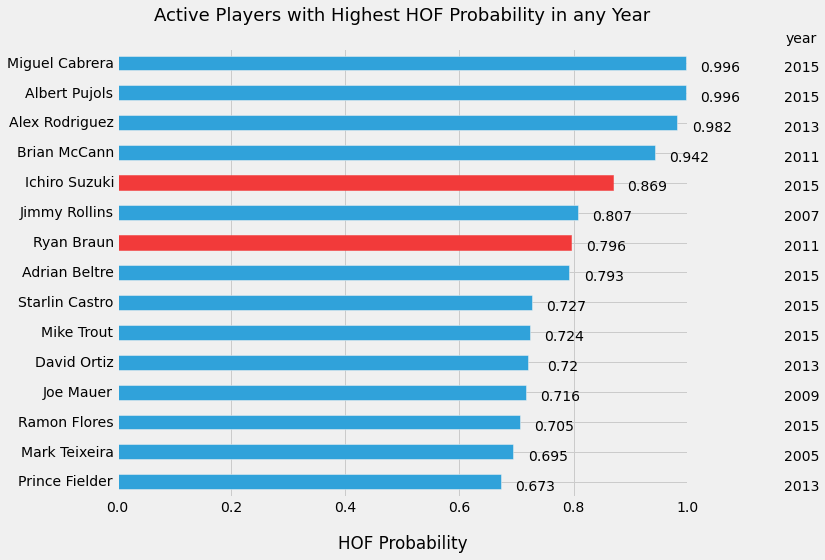

In [33]:
# Max probs at whichever year

# predicted_hof_active6_df_max = predicted_hof_active6_df.groupby('name').max().sort_values(by='prob')

idx = predicted_hof_active7_df.groupby('name')['prob'].transform(max) == predicted_hof_active7_df['prob']

predicted_hof_active7_df_max = predicted_hof_active7_df[idx].groupby('name').max().sort_values(by='prob')

# Bar chart of players with highest chances of making it to 
index = np.arange(len(predicted_hof_active7_df_max.tail(15)))

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10,8))
#     barlst = plt.barh(index -.25, predicted_hof_active6_df_max['prob'].tail(15), height=0.5)
#     barlst[8].set_color('r')
#     barlst[10].set_color('r')
    
    ax = predicted_hof_active7_df_max['prob'].tail(15).plot(kind='barh')
    ax.set_ylabel('')
    
    rects = ax.patches
    rects[8].set_color('#F23A3A')
    rects[10].set_color('#F23A3A')
    #    rects[10].set_color('#E63535')

    yrs = [yr for yr in predicted_hof_active7_df_max['yearID'].tail(15)]
    probs = [round(prob, 3) for prob in predicted_hof_active7_df_max['prob'].tail(15)]

    for rect, prob, yr in zip(rects, probs, yrs):
        width = rect.get_width()
#         ax.text(rect.get_x() + width + 0.075, rect.get_y() - rect.get_height()/4, label, ha='center', va='bottom')
        ax.text(rect.get_x() + width + 0.06, rect.get_y() - rect.get_height()/4, prob, ha='center', va='bottom')
        ax.text(1.2, rect.get_y() - rect.get_height()/4, yr, ha='center', va='bottom')

    ax.text(1.2, 14.6, 'year', ha='center', va='bottom')
    ax.set_title('Active Players with Highest HOF Probability in any Year ', fontsize=18)
    ax.title.set_position((0.5, 1.05))
#    labels = predicted_hof_active6_df_max.tail(15).index
#    plt.yticks(index, labels)
    plt.xlabel('HOF Probability', labelpad=20)
    plt.tight_layout()
    plt.savefig('Top15_any_yr_2.png', transparent=True)
    plt.show()


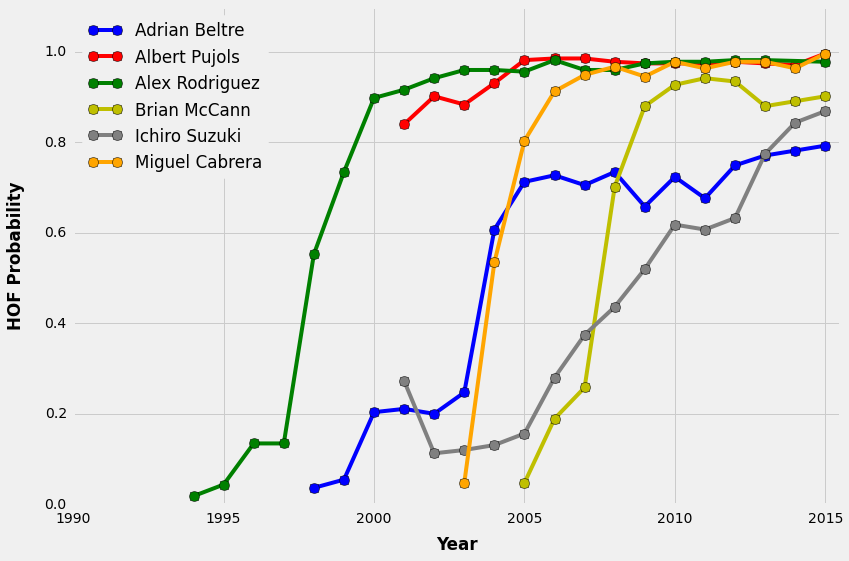

In [235]:
grouped7 = predicted_hof_active7_df[['name', 'yearID', 'prob']].groupby(['name'])

name_lst = []
plt.figure(figsize=(12,8))
colors = ['b', 'r', 'g', 'y', 'gray', 'orange']
i = 0
with plt.style.context('fivethirtyeight'):
    for name, df in grouped7:
        if name in predicted_hof_active7_df_lastyr['name'].tail(6).values:
            name_lst.append(name)
            plt.plot(df['yearID'], df['prob'], '-o', markersize=10, color=colors[i])
            #color=colors[i]
            plt.ylim(0, 1.1)
            plt.xlim(1990, 2015.5)
            plt.tick_params(axis='both', which='major', pad=7.5)
            plt.xlabel('Year', labelpad=10, weight='semibold')
            plt.ylabel('HOF Probability', labelpad=20, weight='semibold')
            plt.tight_layout()
            i += 1
    plt.legend(name_lst, loc=2)
    plt.savefig('Top6_career_2.png', transparent=True)
    plt.show()

## rf08b model w/ data  graphs

In [38]:
active_pred8 = rf08b.predict(active_hitters_X8)
active_prob8 = rf08b.predict_proba(active_hitters_X8)

active_hitters8['pred'] = pd.Series(active_pred8, index=active_hitters8.index)
active_hitters8['prob'] = pd.Series(active_prob8[:,1], index=active_hitters8.index)

predicted_hof_active8 = active_hitters8[active_hitters8['pred'] == 1]['name'].unique()
predicted_hof_active8_df = active_hitters8[active_hitters8['name'].isin(predicted_hof_active8)]

In [274]:
def plot_current_yr_probs(df, num):

    # Top probs at current year

    #predicted_hof_active6_df_mean = predicted_hof_active6_df.groupby('name').mean().sort_values(by='prob')
    df_lastyr = df[df['yearID'] == 2015].sort_values(by='prob')

    # Bar chart of players with highest chances of making it to 
    index = np.arange(len(df_lastyr.tail(num)))

    with plt.style.context('fivethirtyeight'):
        plt.figure(figsize=(10,8))
    #    matplotlib.rcParams['figure.figsize'] = 9, 7
        ax = df_lastyr['prob'].tail(num).plot(kind='barh', fontsize=18)
        ax.set_ylabel('')

        yrs_played = [yr for yr in df_lastyr['year'].tail(num)]
        probs = [round(prob, 3) for prob in df_lastyr['prob'].tail(num)]

        rects = ax.patches
        yticks_pos = []
        for rect, prob, yr in zip(rects, probs, yrs_played):
            height = rect.get_height()
            width = rect.get_width()
            ax.text(rect.get_x() + width + 0.065, rect.get_y(), prob, ha='center', va='bottom', fontsize=16)
    #        ax.text(1.05, rect.get_y(), prob, ha='center', va='bottom', fontsize=16)

            ax.text(1.175, rect.get_y(), yr, ha='center', va='bottom', fontsize=16)
            yticks_pos.append(rect.get_y() + rect.get_height()/2)

        ax.text(1.175, 2 * height * (num - 0.25), 'years', ha='center', va='bottom', fontsize=16)
#        ax.text(1.175, 14.6, 'years', ha='center', va='bottom', fontsize=16)
        ax.set_title('Active Players with Highest HOF Probability as of 2015', fontsize=24)
        ax.title.set_position((0.5, 1.075))

        labels = df_lastyr['name'].tail(num).values
        plt.xlabel('HOF Probability', labelpad=20, fontsize=22)
        plt.xlim(0, 1.125)
    #    xticks_pos = [rect.get_height() - 0.5 ] for patch in rects]

        plt.yticks(index, labels)
        plt.yticks(yticks_pos, ha='right')
        plt.tick_params(axis='both', which='major', pad=7.5)
    #    plt.tight_layout(pad=0.5, w_pad=0.2, h_pad=0.2)
        a = plt.gca()
    #    a.set_frame_on(False)
        plt.savefig('./figures/Top15_latest_yr.png', transparent=True, dpi=(150), bbox_inches='tight')
        plt.show()



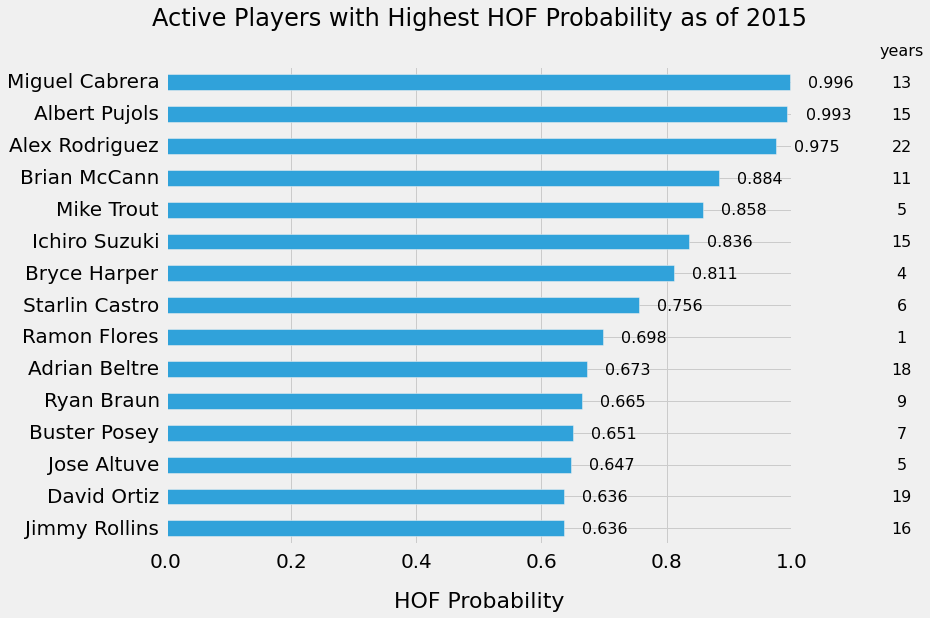

In [184]:
plot_current_yr_probs(predicted_hof_active8_df, 15)

In [276]:
def plot_max_prob_any_yr(df, num):
    # Max probs at whichever year

    # predicted_hof_active6_df_max = predicted_hof_active6_df.groupby('name').max().sort_values(by='prob')

    idx = df.groupby('name')['prob'].transform(max) == df['prob']

    df_max = df[idx].groupby('name').max().sort_values(by='prob')

    # Bar chart of players with highest chances of making it to 
    index = np.arange(len(df_max.tail(num)))

    with plt.style.context('fivethirtyeight'):
        plt.figure(figsize=(12,10))
    #     barlst = plt.barh(index -.25, predicted_hof_active6_df_max['prob'].tail(15), height=0.5)
    #     barlst[8].set_color('r')
    #     barlst[10].set_color('r')

        ax = df_max['prob'].tail(num).plot(kind='barh', fontsize=17)
        ax.set_ylabel('')

        rects = ax.patches
        rects[2].set_color('#F55858')
        rects[9].set_color('#F55858')
        # rects[10].set_color('#E63535')
        # rects[2].set_color('#F23A3A')
        
        yrs = [yr for yr in df_max['yearID'].tail(num)]
        probs = [round(prob, 3) for prob in df_max['prob'].tail(num)]

        for rect, prob, yr in zip(rects, probs, yrs):
            height = rect.get_height()
            width = rect.get_width()
    #         ax.text(rect.get_x() + width + 0.075, rect.get_y() - rect.get_height()/4, label, ha='center', va='bottom')
            ax.text(rect.get_x() + width + 0.065, rect.get_y() - rect.get_height()/8, prob, ha='center', va='bottom',\
                    fontsize=16)
            ax.text(1.2, rect.get_y() - rect.get_height()/8, yr, ha='center', va='bottom', fontsize=16)

        ax.text(1.2, 2 * height * (num - 0.25), 'year', ha='center', va='bottom', fontsize=16)

#        ax.text(1.2, 14.6, 'year', ha='center', va='bottom', fontsize=16)
        ax.set_title('Active Players with Highest HOF Probability in any Year ', fontsize=24)
        ax.title.set_position((0.5, 1.075))
    #    labels = predicted_hof_active6_df_max.tail(15).index
    #    plt.yticks(index, labels)
        
        plt.tick_params(axis='both', which='major', pad=7.5)
        plt.xlabel('HOF Probability', labelpad=20, fontsize=22)
        plt.xlim(0, 1.125)
        plt.tight_layout()
        plt.savefig('./figures/Top20_any_yr.png', transparent=True, dpi=(150), bbox_inches='tight', frameon=False)
        plt.show()


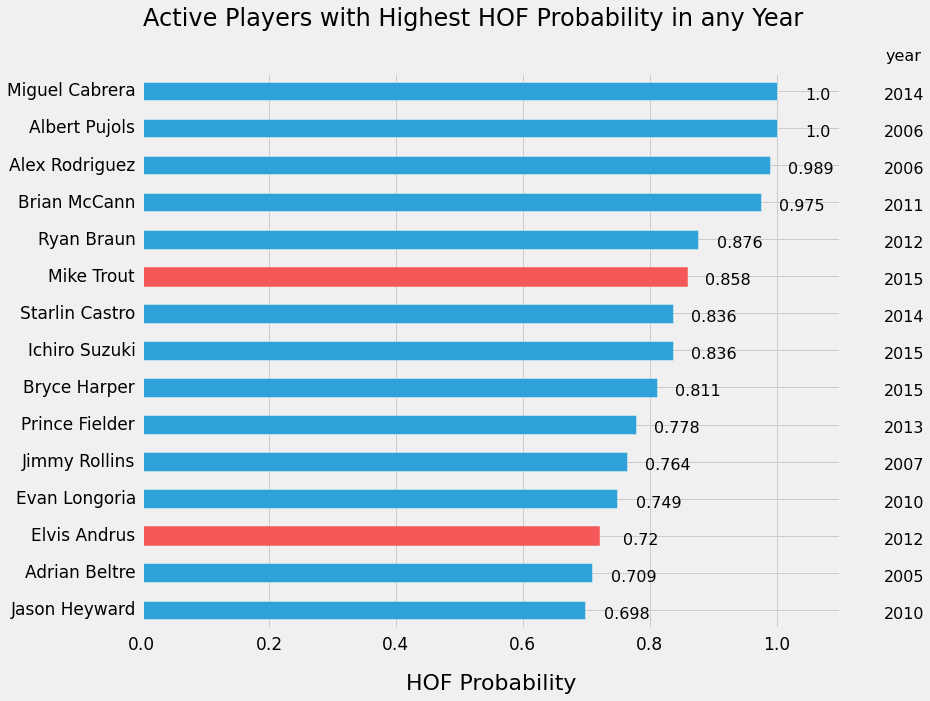

In [264]:
plot_max_prob_any_yr(predicted_hof_active8_df, 15)

## rf09b model viz

In [57]:
active_pred9 = rf09b.predict(active_hitters_X9)
active_prob9 = rf09b.predict_proba(active_hitters_X9)

active_hitters9['pred'] = pd.Series(active_pred9, index=active_hitters9.index)
active_hitters9['prob'] = pd.Series(active_prob9[:,1], index=active_hitters9.index)

predicted_hof_active9 = active_hitters9[active_hitters9['pred'] == 1]['name'].unique()
predicted_hof_active9_df = active_hitters9[active_hitters9['name'].isin(predicted_hof_active9)]

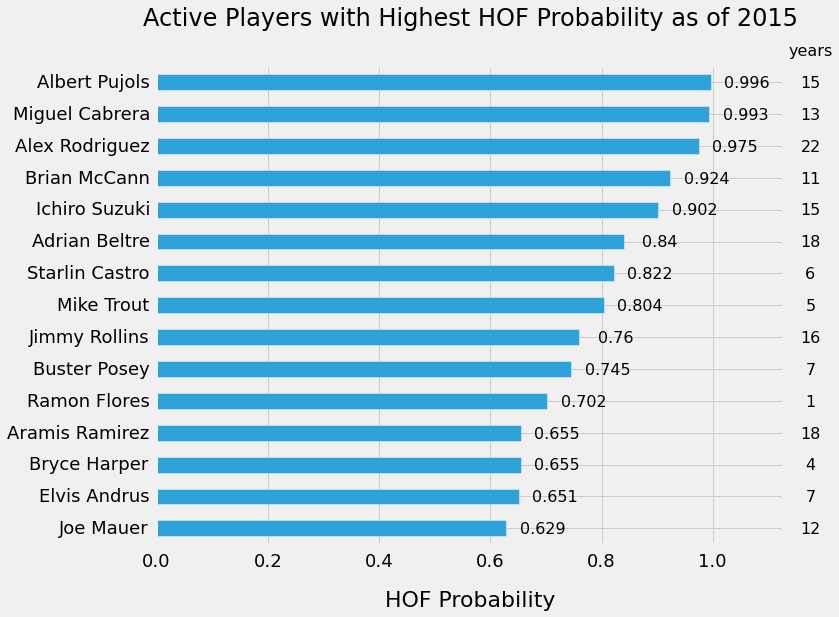

In [299]:
plot_current_yr_probs(predicted_hof_active9_df, 15)

In [331]:
def plot_player_career(df, avg_hitters, num=5):
    grouped = df[['name', 'yearID', 'prob']].groupby(['name'])
    df_lastyr = df[df['yearID'] == 2015].sort_values(by='prob')
    
    name_lst = []
    plt.figure(figsize=(12,8))
    colors = ['b', 'r', 'g', 'y', 'gray', 'orange']
    i = 0
    with plt.style.context('fivethirtyeight'):
        for name, df_player in grouped:
            if name in df_lastyr['name'].tail(num).values:
                name_lst.append(name)
                plt.plot(df_player['yearID'], df_player['prob'], '-o', markersize=10, color=colors[i])
                plt.ylim(0, 1.1)
                plt.xlabel('Year', labelpad=20, fontsize=20, weight='semibold')
                plt.ylabel('HOF Probability', labelpad=20, fontsize=20, weight='semibold')
                plt.tight_layout()
                i += 1
                
        # plot lines corresponding to average player probability
        positions = ['C', '1B', 'SS', '3B', 'OF']
        position_colors = ['y', 'r', 'g', 'b', 'gray']
        j=0
        for position in positions:
            # avg_hitters.index
            plt.axhline(y=avg_hitters.loc[position]['prob'], color=position_colors[j], linestyle='--', linewidth=1)
            j += 1
            plt.legend(name_lst, loc=2)
            
        plt.tick_params(axis='both', which='major', pad=15)
        plt.xticks(fontsize=18)
        plt.xlim(1990, 2015.5)
        plt.yticks(fontsize=18)
        plt.savefig('./figures/Top6_career.png', transparent=True, dpi=(150), bbox_inches='tight')
        plt.show()

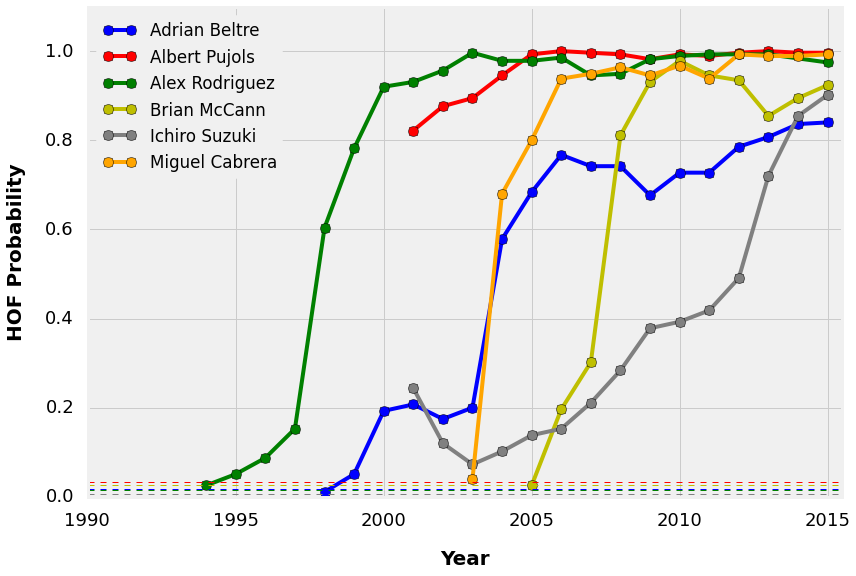

In [332]:
plot_player_career(predicted_hof_active9_df, avg_hitters9, 6)

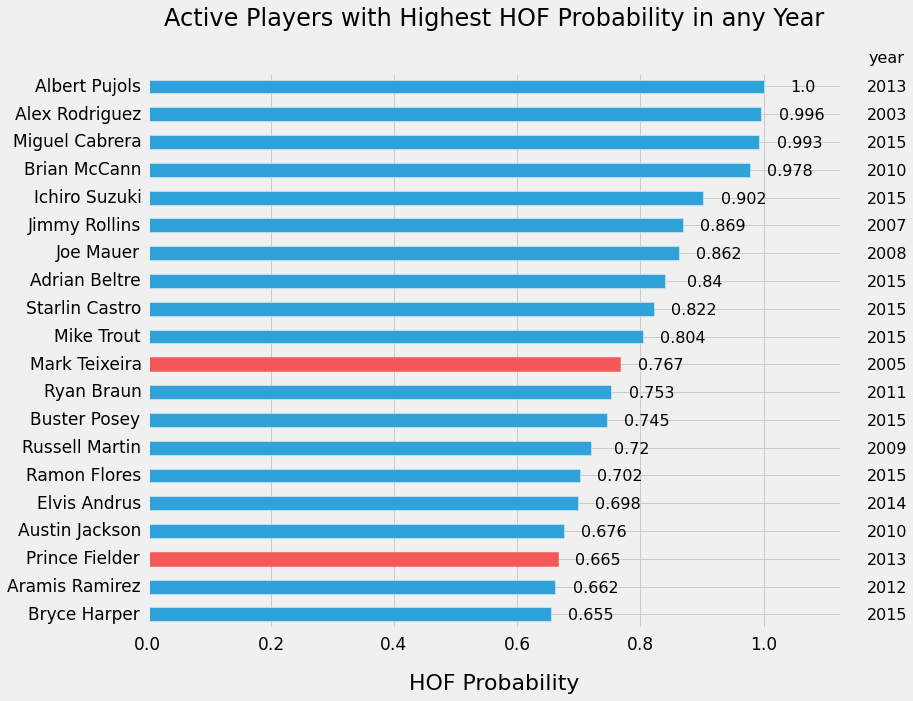

In [277]:
plot_max_prob_any_yr(predicted_hof_active9_df, 20)

In [119]:
predicted_hof_active9_df[predicted_hof_active9_df['yearID'] == 2015].sort_values(by='prob', ascending=False)

,playerID,name,yearID,year,pred,prob
24269,pujolal01,Albert Pujols,2015,15,1,0.996364
20605,cabremi01,Miguel Cabrera,2015,13,1,0.992727
46185,rodrial01,Alex Rodriguez,2015,22,1,0.974545
36989,mccanbr01,Brian McCann,2015,11,1,0.923636
17284,suzukic01,Ichiro Suzuki,2015,15,1,0.901818
48072,beltrad01,Adrian Beltre,2015,18,1,0.840000
42471,castrst01,Starlin Castro,2015,6,1,0.821818
17916,troutmi01,Mike Trout,2015,5,1,0.803636
46244,rolliji01,Jimmy Rollins,2015,16,1,0.760000
38640,poseybu01,Buster Posey,2015,7,1,0.745455


In [280]:
def plot_player_career_2(df, players):
    grouped = df[['name', 'yearID', 'prob']].groupby(['name'])
    df_lastyr = df[df['yearID'] == 2015].sort_values(by='prob')
    
    name_lst = []
    plt.figure(figsize=(12,8))

    with plt.style.context('fivethirtyeight'):
        for name, df_player in grouped:
            if name in players:
                name_lst.append(name)
                plt.plot(df_player['yearID'], df_player['prob'], '-o', markersize=10)
                plt.ylim(0, 1.1)
                plt.xlabel('Year', labelpad=20, fontsize=20, weight='semibold')
                plt.ylabel('HOF Probability', labelpad=20, fontsize=20, weight='semibold')
                plt.tight_layout()
    
    
        ax = plt.gca()
        ax.annotate('wrist\ninjury', xy=(2013, 0.2), xycoords='data',
                    xytext=(2012, 0.05), textcoords='data',
                    arrowprops=dict(facecolor='0.5', shrink=0.1),
                    horizontalalignment='right', verticalalignment='bottom',
                    color=(0.2, 0.65, 0.85), fontsize=14, weight='semibold')

        ax.annotate('neck\ninjury', xy=(2014.1, 0.28), xycoords='data',
                    xytext=(2014.85, 0.35), textcoords='data',
                    arrowprops=dict(facecolor='0.5', shrink=0.1),
                    horizontalalignment='left', verticalalignment='bottom',
                    color=(1, 0.35, 0.33), fontsize=14, weight='semibold')


        plt.legend(name_lst, loc=2)
        plt.tick_params(axis='both', which='major', pad=10)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.savefig('./figures/Injury_toll.png', transparent=True, dpi=(150), bbox_inches='tight')
        plt.show()



In [253]:
players = ['Mark Teixeira', 'Prince Fielder']

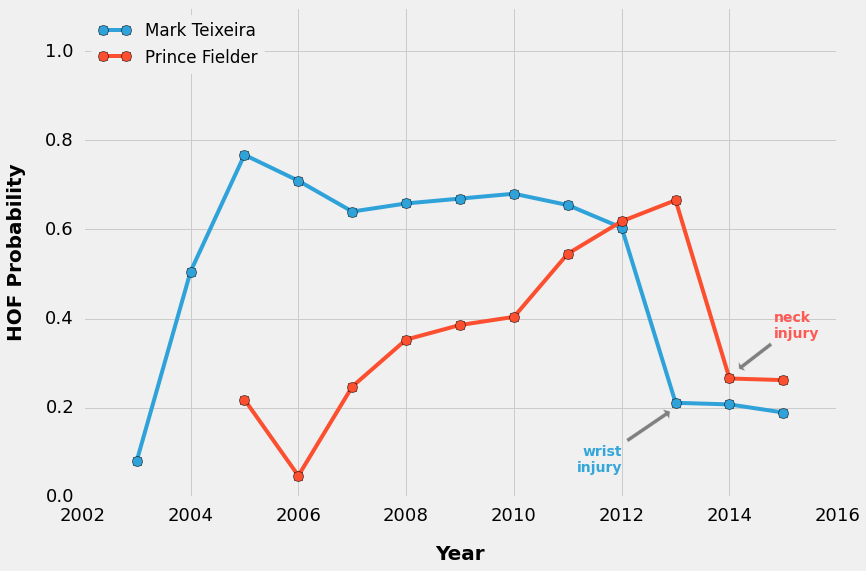

In [281]:
plot_player_career_2(predicted_hof_active9_df, players)

## Determine average stats of all nonHOFers at each position


In [199]:
with open('avg_hitters_X9.pkl') as f:
    avg_hitters_X9 = pickle.load(f)


In [205]:
avg_pred9 = rf09b.predict(avg_hitters_X9)
avg_prob9 = rf09b.predict_proba(avg_hitters_X9)

avg_hitters9 = avg_hitters_X9.copy()

avg_hitters9['pred'] = pd.Series(avg_pred9, index=avg_hitters9.index)
avg_hitters9['prob'] = pd.Series(avg_prob9[:,1], index=avg_hitters9.index)

#predicted_hof_avg9 = avg_hitters9[avg_hitters9['pred'] == 1]['name'].unique()
#predicted_hof_avg9_df = avg_hitters9[avg_hitters9['name'].isin(predicted_hof_avg9)]

In [206]:
avg_pred9

array([0, 0, 0, 0, 0, 0, 0])

In [207]:
avg_prob9

array([[ 0.97454545,  0.02545455],
       [ 0.99272727,  0.00727273],
       [ 0.96727273,  0.03272727],
       [ 0.98181818,  0.01818182],
       [ 0.98545455,  0.01454545],
       [ 0.98545455,  0.01454545],
       [ 1.        ,  0.        ]])

In [282]:
avg_hitters9['prob']

POS
C     0.025455
OF    0.007273
1B    0.032727
3B    0.018182
2B    0.014545
SS    0.014545
DH    0.000000
Name: prob, dtype: float64

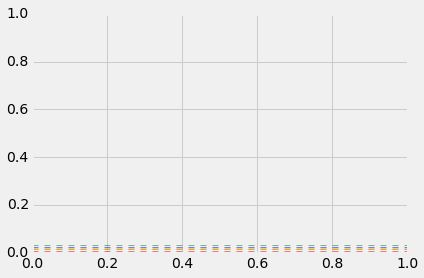

In [225]:
colors = ['b', 'r', 'g', 'y', 'gray', 'orange', 'cyan']
i=0
for position in avg_hitters9.index:
    plt.axhline(y=avg_hitters9.loc[position]['prob'], color=colors[i], linestyle='--', linewidth=0.5)
    i += 1

In [220]:
avg_hitters9.loc['C']['prob']

0.025454545454545455

In [284]:
young_players = ['Mike Trout', 'Bryce Harper', 'Buster Posey']

In [288]:
#df = predicted_hof_active6_df

def plot_early_career(df, players):
    grouped = df[['name', 'yearID', 'prob']].groupby(['name'])

    name_lst = []
    yearID_lst = []
    with plt.style.context('fivethirtyeight'):
        plt.figure(figsize=(12,8))
        for name, df in grouped:
            if name in set(players):
                name_lst.append(name)
                yearID_lst.append(list(df['yearID'].values))
                plt.plot(df['yearID'], df['prob'], '-o', markersize=10)
        yearIDs = list(set([yearID for i in yearID_lst for yearID in i]))
        ax= plt.gca()
        plt.xticks(np.arange(min(yearIDs), max(yearIDs) + 1, 1))
        ax.set_xticklabels(yearIDs)
        ax.tick_params(axis='both', which='major', pad=12.5)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        ax.set_xlim(2008.5, 2015.5)
        plt.xlabel('Year', labelpad=20, fontsize=18, weight='semibold')
        plt.ylabel('HOF probability', labelpad=20, fontsize=18, weight='semibold')
        plt.legend(name_lst, loc=0)
        plt.savefig('./figures/Early_career.png', transparent=True, dpi=(150), bbox_inches='tight')

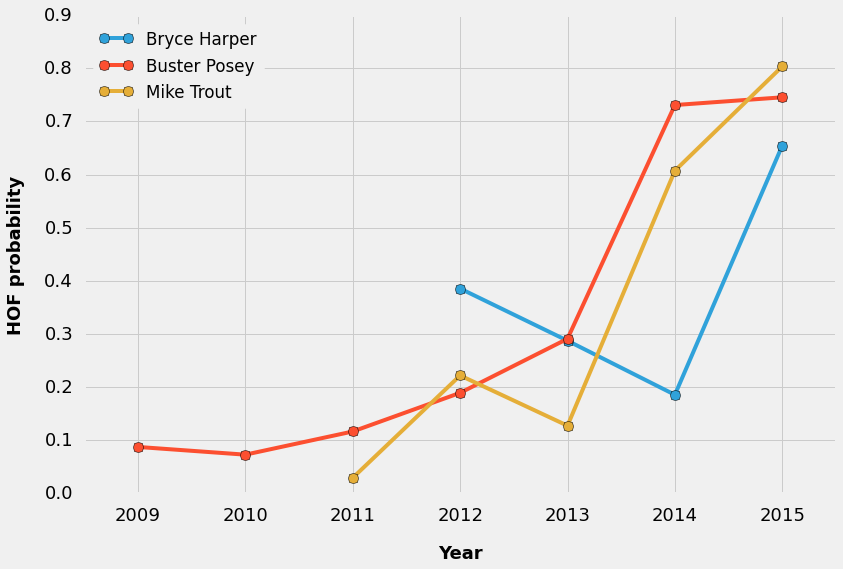

In [289]:
plot_early_career(predicted_hof_active9_df, young_players)

### Younger players HOF chances

In [329]:
def plot_current_yr_probs_highlight(df, num=15):

    # Top probs at current year

    #predicted_hof_active6_df_mean = predicted_hof_active6_df.groupby('name').mean().sort_values(by='prob')
    df_lastyr = df[df['yearID'] == 2015].sort_values(by='prob')

    # Bar chart of players with highest chances of making it to 
    index = np.arange(len(df_lastyr.tail(num)))

    with plt.style.context('fivethirtyeight'):
        plt.figure(figsize=(10,8))
    #    matplotlib.rcParams['figure.figsize'] = 9, 7
        ax = df_lastyr['prob'].tail(num).plot(kind='barh', fontsize=18)
        ax.set_ylabel('')

        yrs_played = [yr for yr in df_lastyr['year'].tail(num)]
        probs = [round(prob, 3) for prob in df_lastyr['prob'].tail(num)]

        rects = ax.patches
        rects[2].set_color('#6EEB8F')
        rects[5].set_color('#6EEB8F')
        rects[7].set_color('#6EEB8F')

        yticks_pos = []
        for rect, prob, yr in zip(rects, probs, yrs_played):
            height = rect.get_height()
            width = rect.get_width()
            ax.text(rect.get_x() + width + 0.065, rect.get_y(), prob, ha='center', va='bottom', fontsize=16)
    #        ax.text(1.05, rect.get_y(), prob, ha='center', va='bottom', fontsize=16)

            ax.text(1.175, rect.get_y(), yr, ha='center', va='bottom', fontsize=16)
            yticks_pos.append(rect.get_y() + rect.get_height()/2)

        ax.text(1.175, 2 * height * (num - 0.25), 'years', ha='center', va='bottom', fontsize=16)
#        ax.text(1.175, 14.6, 'years', ha='center', va='bottom', fontsize=16)
        ax.set_title('Active Players with Highest HOF Probability as of 2015', fontsize=24)
        ax.title.set_position((0.5, 1.075))
        ax.add_patch(patches.Rectangle((1.1, 10 * height), 0.75, 0.75, alpha=None))
        #facecolor='none'
        labels = df_lastyr['name'].tail(num).values
        plt.xlabel('HOF Probability', labelpad=20, fontsize=22)
        plt.xlim(0, 1.125)
    #    xticks_pos = [rect.get_height() - 0.5 ] for patch in rects]

        plt.yticks(index, labels)
        plt.yticks(yticks_pos, ha='right')
        plt.tick_params(axis='both', which='major', pad=7.5)
    #    plt.tight_layout(pad=0.5, w_pad=0.2, h_pad=0.2)
        a = plt.gca()
    #    a.set_frame_on(False)
        plt.savefig('./figures/top15_latest_yr_highlight_young_players.png', \
                    transparent=True, dpi=(150), bbox_inches='tight')
        plt.show()



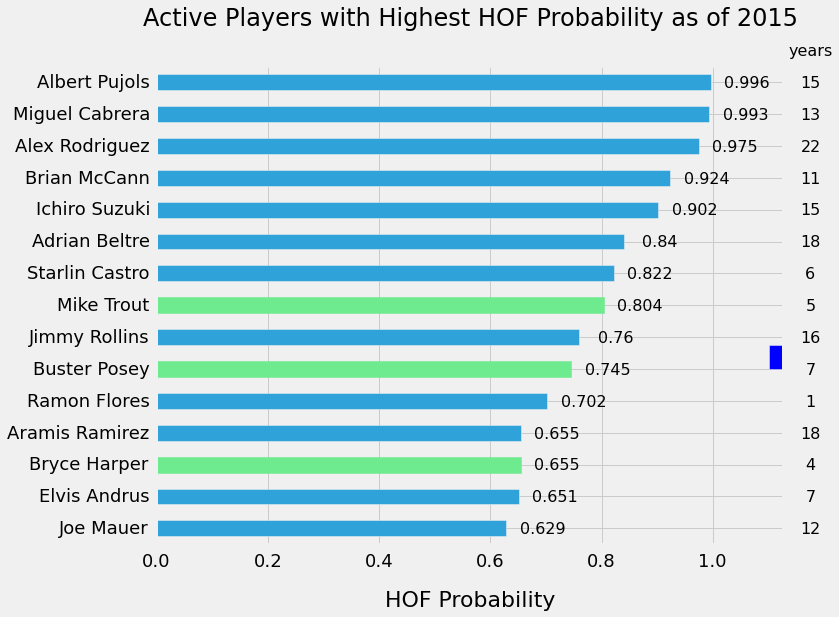

In [330]:
plot_current_yr_probs_highlight(predicted_hof_active9_df)